# Evaluate across GloVe models
Copyright (C) 2021 ServiceNow, Inc.

This notebook contains code for running and visualizing geology-specific evaluation of word embeddings, comparing across models.

## Load the model embedding map

In [2]:
import pandas as pd
MODEL_MAP = pd.read_csv('/nrcan_p2/data/07_model_output/glove_geology_evaluation/GLOVE_MODEL_MAP.csv')
MODEL_MAP

,dataset,pipeline,path,dim
0,A full,v1,/nrcan_p2/data/06_models/glove/dataset_A_01-29...,50
1,A full + B,v1,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
2,A full + B + D,v1,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
3,B,v1,/nrcan_p2/data/06_models/glove/dataset_B_01-29...,50
4,D,v1,/nrcan_p2/data/06_models/glove/dataset_D_02-16...,50
5,A full,80,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
6,A full + B,80,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
7,A full + B + D,80,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
8,A full,90,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50
9,A full + B,90,/nrcan_p2/data/06_models/glove/dataset_A_full_...,50


In [3]:
def concat_files(format_func):
    dfs = []
    for irow,row in MODEL_MAP.iterrows():
        name = row.dataset
        if name == 'A full':
            name = 'dA_full'
        elif name == 'A full + B':
            name = 'dA_full_dB'
        elif name == 'A full + B + D':
            name = 'dA_full_dB_dD'

        dim = row.dim
        if dim == 300 and row.dataset not in ['6B']:
            MODEL_NAME = f'glove.{name}.{row.pipeline}.{dim}' 
        else:
            MODEL_NAME = f'glove.{name}.{row.pipeline}'
        fname = format_func(MODEL_NAME)
        try:
            df = pd.read_csv(f'/nrcan_p2/data/07_model_output/glove_geology_evaluation/{fname}')
            df['model'] = MODEL_NAME
            df['dataset'] = name
            df['pipeline'] = row.pipeline
            df['dim'] = row.dim
            dfs.append(df)
            print(fname)
        except Exception as e:
            print(e)
            pass

    dfs = pd.concat(dfs, axis=0)    
    return dfs

## Evaluate Analogies

### Load the analogy results...

In [4]:
format_func = lambda MODEL_NAME: f'analogy_summary_{MODEL_NAME}.csv'
analogy_res = concat_files(format_func)


analogy_summary_glove.dA_full.v1.csv
analogy_summary_glove.dA_full_dB.v1.csv
analogy_summary_glove.dA_full_dB_dD.v1.csv
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/analogy_summary_glove.B.v1.csv'
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/analogy_summary_glove.D.v1.csv'
analogy_summary_glove.dA_full.80.csv
analogy_summary_glove.dA_full_dB.80.csv
analogy_summary_glove.dA_full_dB_dD.80.csv
analogy_summary_glove.dA_full.90.csv
analogy_summary_glove.dA_full_dB.90.csv
analogy_summary_glove.dA_full_dB_dD.90.csv
analogy_summary_glove.dA_full.PLUS.csv
analogy_summary_glove.dA_full_dB.PLUS.csv
analogy_summary_glove.dA_full_dB_dD.PLUS.csv
analogy_summary_glove.6B.300d.csv
analogy_summary_glove.6B.50d.csv
analogy_summary_glove.dA_full.v1.300.csv
analogy_summary_glove.dA_full_dB.v1.300.csv
analogy_summary_glove.dA_full_dB_dD.v1.300.csv
analogy_summary_glove.dA_full.80.300.csv
analogy_summary_glove.

In [5]:
analogy_res

,Unnamed: 0,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,...,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present,model,dataset,pipeline,dim
0,0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,0.0,0.0,0.0,...,0.50,1.00,93.25,0.452244,4,1.0,glove.dA_full.v1,dA_full,v1,50
1,1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,0.0,0.0,0.0,...,0.00,0.00,NaN,0.690779,4,1.0,glove.dA_full.v1,dA_full,v1,50
2,2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,...,0.50,1.00,369.00,0.438248,4,1.0,glove.dA_full.v1,dA_full,v1,50
3,3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,0.0,1.0,1.0,...,1.00,1.00,29.25,0.345037,4,1.0,glove.dA_full.v1,dA_full,v1,50
4,4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,0.0,1.0,1.0,...,1.00,1.00,21.50,0.348734,4,1.0,glove.dA_full.v1,dA_full,v1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial,0.0,0.0,0.0,...,0.00,0.50,331.00,0.770319,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
62,62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated,0.0,0.0,1.0,...,0.75,1.00,76.00,0.700947,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
63,63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression,0.0,0.0,0.0,...,0.25,0.25,34.00,0.783191,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
64,64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar,0.0,1.0,1.0,...,0.75,1.00,70.50,0.535395,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


Filter to the analogies for which all models contain all four words in their vocabularies 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

x = analogy_res \
    .set_index(['dim', 'dataset', 'pipeline', 'Theme', 'a', 'x', 'b', 'y']).unstack(['dim', 'dataset', 'pipeline'])
x = x[x['n_present'].mean(axis=1) == 4]

x = x.stack(['dim', 'dataset', 'pipeline'])

analogy_res_4 = x

### Display overall performance for all models in a color-coded table 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

x = analogy_res.groupby(['dataset', 'dim', 'pipeline']).mean().filter(regex='avg_|n_present|perc_present')

x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

x = x.set_index(['dataset', 'pipeline', 'dim']).sort_index(level=['dataset','pipeline', 'dim'])
display(x.style.background_gradient(cmap='Blues', axis=0))

### Display overall analogy performance for all models in a color-coded table, filtering to tests for which all models have all words present

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

x = analogy_res_4.groupby(['dataset', 'dim', 'pipeline']).mean().filter(regex='avg_|n_present|perc_present')
#display(x)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

x = x.set_index(['dataset', 'pipeline', 'dim']).sort_index(level=['dataset','pipeline', 'dim'])
display(x.style.background_gradient(cmap='Blues', axis=0))


### Plot each analogy metric comparing 300d with 50d vectors

We have a couple of options for how we compute average metrics. We can 
* first average scores for all tests within a Theme 
* consider all scores irrespective of Theme

The latter is ideal since we have no real reason to think that performance on Themes is more important than performance on the individual tests individually.

#### Compare across datasets and piplines, average first across themes...

avg_top1


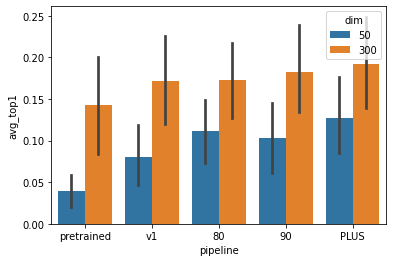

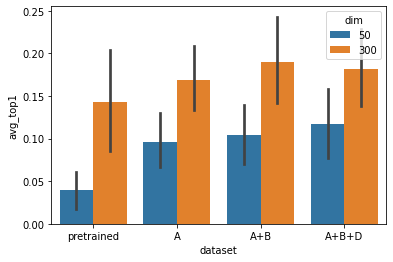

avg_top5


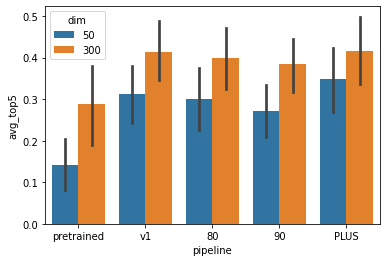

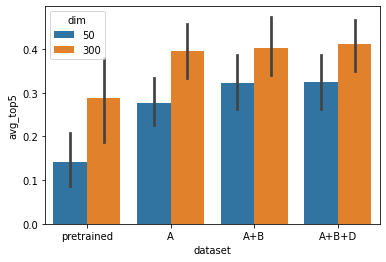

avg_top10


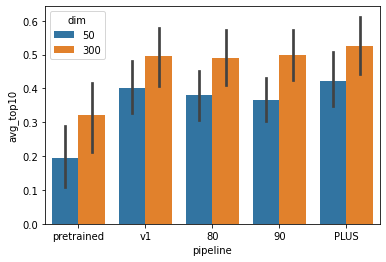

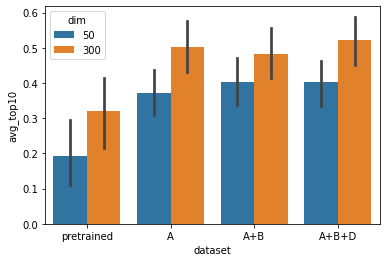

avg_top100


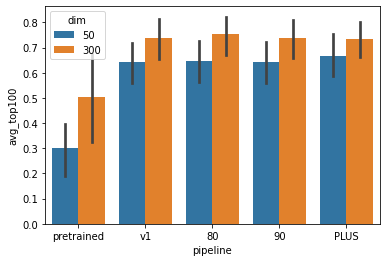

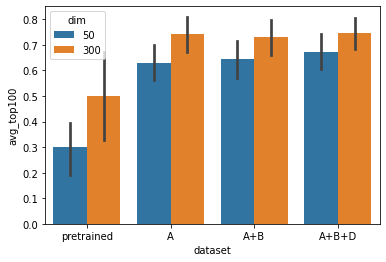

avg_top1000


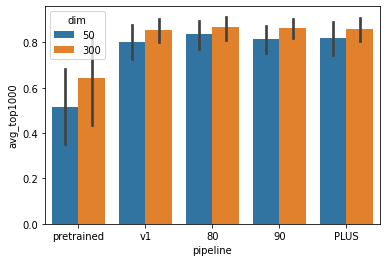

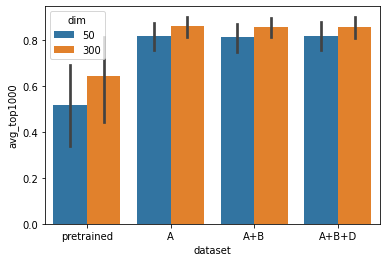

avg_rank


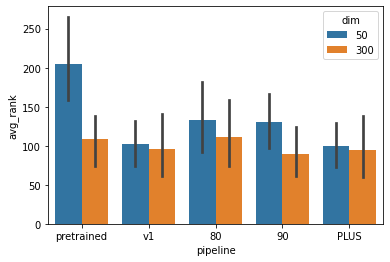

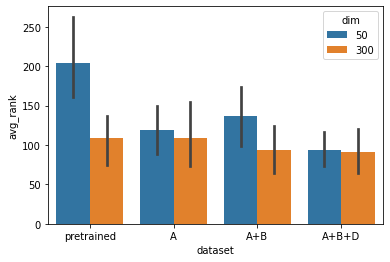

avg_distance


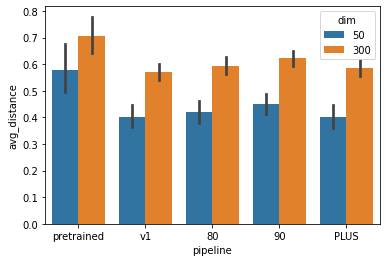

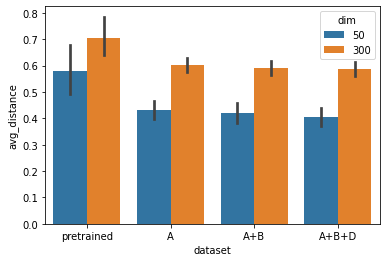

In [60]:
x = analogy_res.groupby(['model', 'dataset', 'pipeline', 'dim', 'Theme']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

for col in analogy_res.filter(regex='avg'):
    print(col)
    sns.barplot(data=x.reset_index(), y=col, x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

    sns.barplot(data=x.reset_index(), y=col, x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

#### Compare across datasets and pipelines, irrespective of Theme...

avg_top1


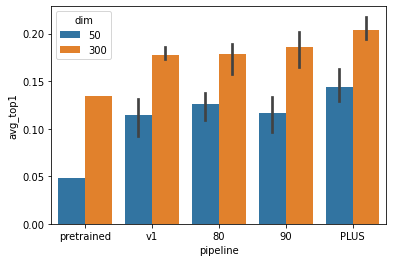

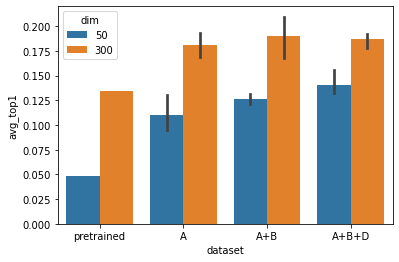

avg_top5


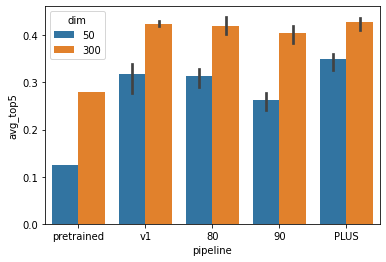

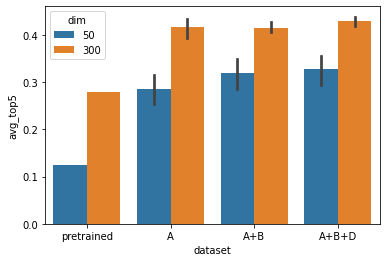

avg_top10


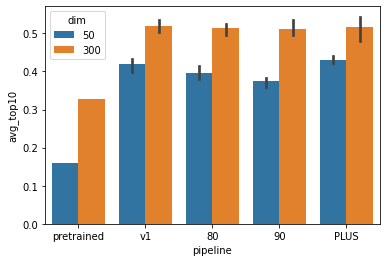

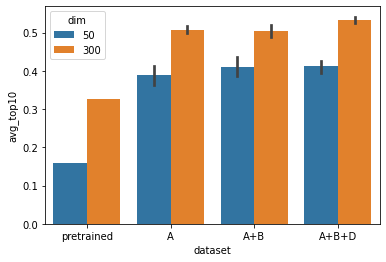

avg_top100


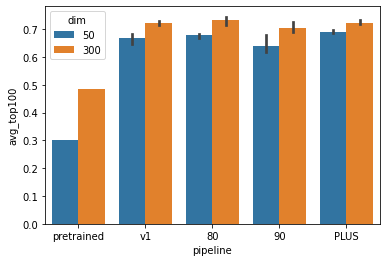

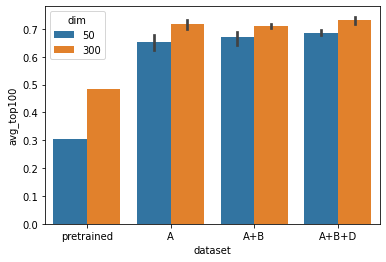

avg_top1000


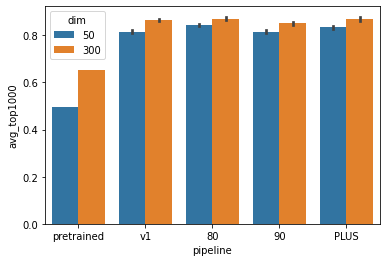

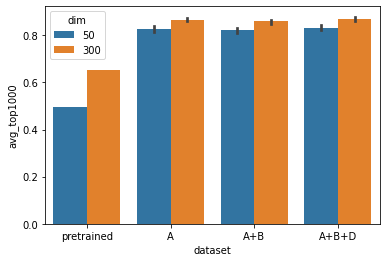

avg_rank


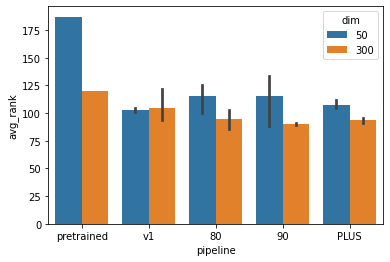

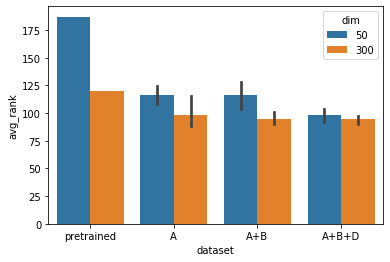

avg_distance


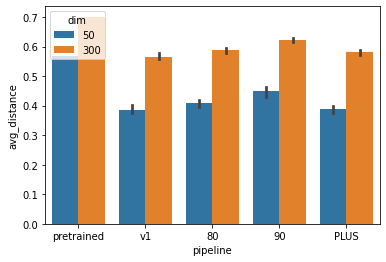

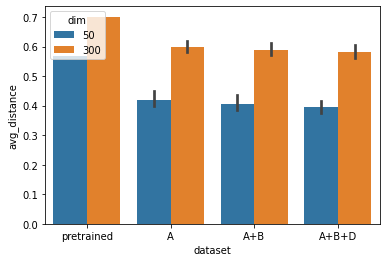

In [59]:
x = analogy_res.groupby(['model', 'dataset', 'pipeline', 'dim']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

for col in analogy_res.filter(regex='avg'):
    print(col)
    sns.barplot(data=x.reset_index(), y=col, x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

    sns.barplot(data=x.reset_index(), y=col, x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

### Plot each analogy metric comparing 300d with 50d vectors, filter to tests for which all models have all words in their vocabularies

#### Compare across pipelines and datasets, irrespective of Theme...

avg_top1


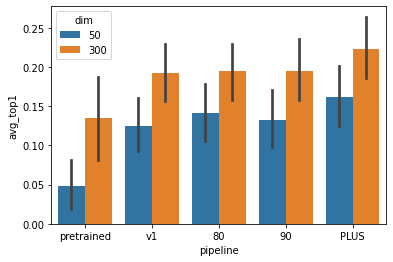

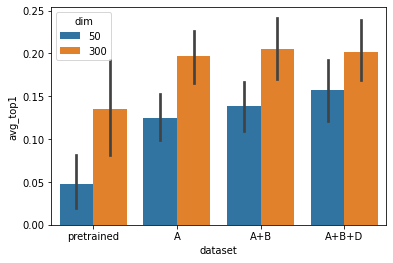

avg_top5


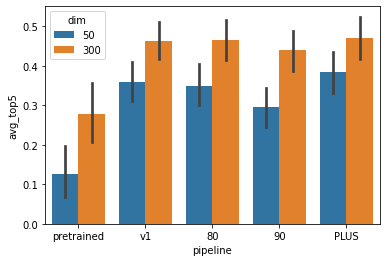

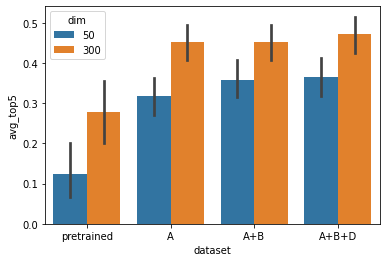

avg_top10


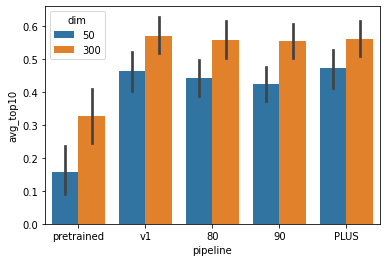

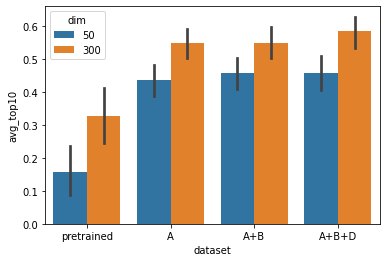

avg_top100


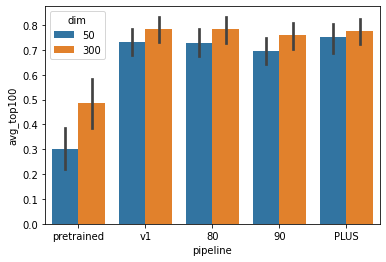

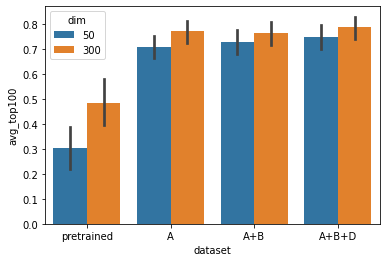

avg_top1000


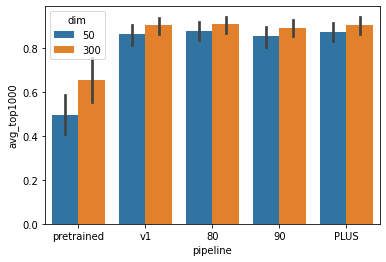

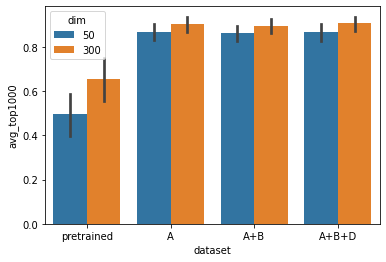

avg_rank


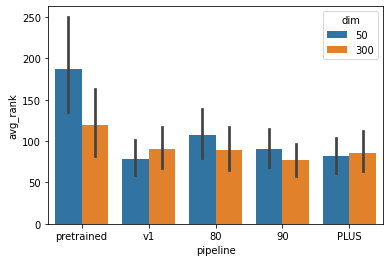

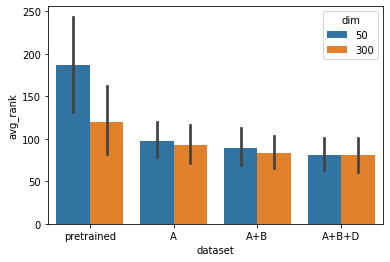

avg_distance


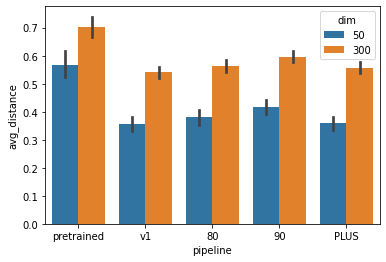

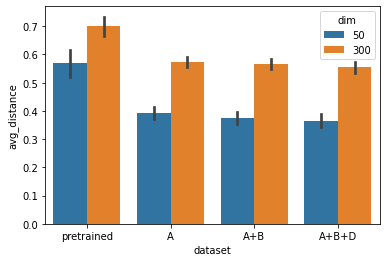

In [132]:
x = analogy_res_4 
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

for col in analogy_res.filter(regex='avg'):
    print(col)
    sns.barplot(data=x.reset_index(), y=col, x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

    sns.barplot(data=x.reset_index(), y=col, x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

#### Compare across datasets and pipelines, averaging first across Theme

avg_top1


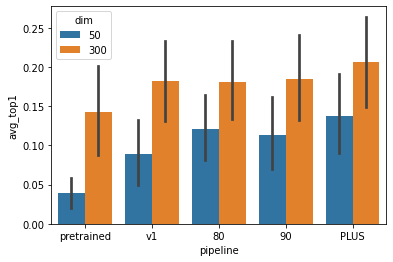

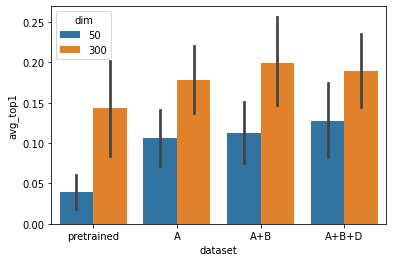

avg_top5


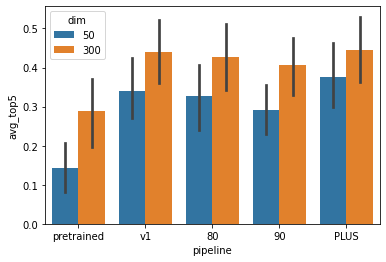

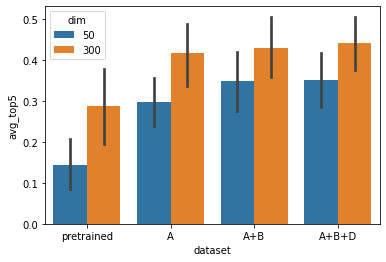

avg_top10


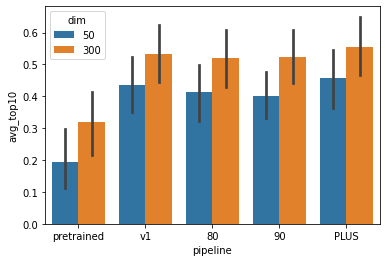

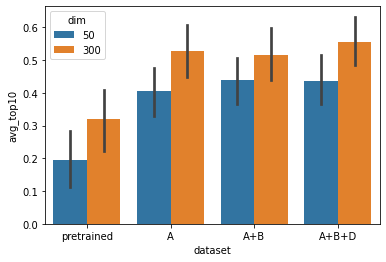

avg_top100


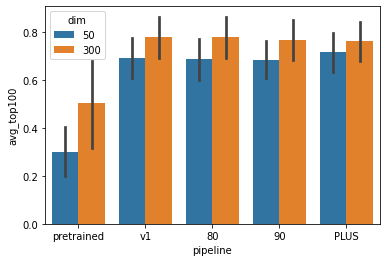

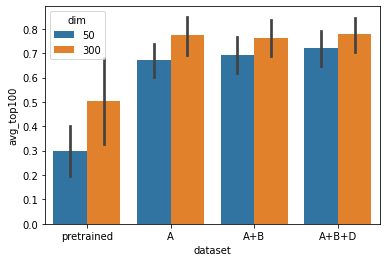

avg_top1000


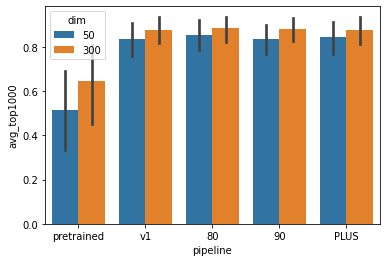

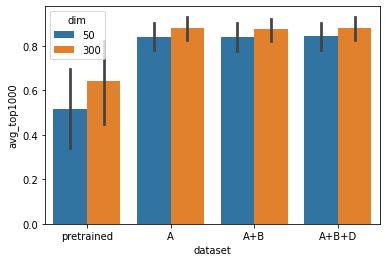

avg_rank


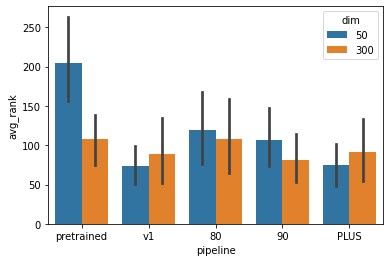

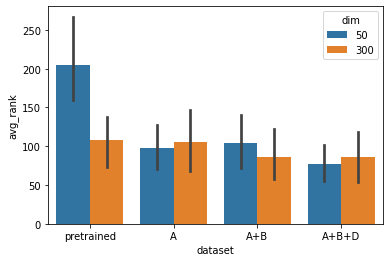

avg_distance


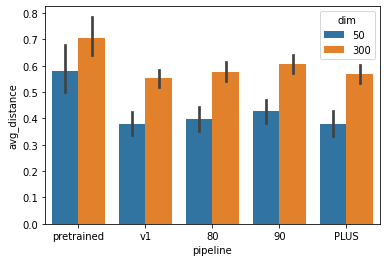

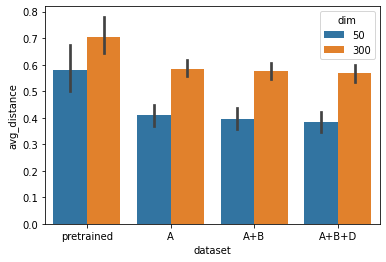

In [126]:
x = analogy_res_4.groupby(['model', 'dataset', 'pipeline', 'dim', 'Theme']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

for col in analogy_res.filter(regex='avg'):
    print(col)
    sns.barplot(data=x.reset_index(), y=col, x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

    sns.barplot(data=x.reset_index(), y=col, x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

### Compare performance across piplines x datasets, for 300d models only, for only tests for which all words are present in all model vocabs

avg_top1


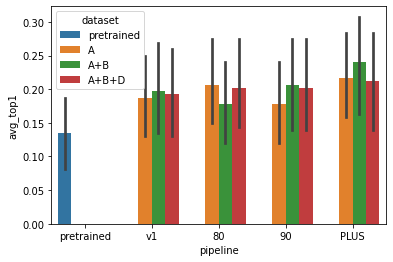

avg_top5


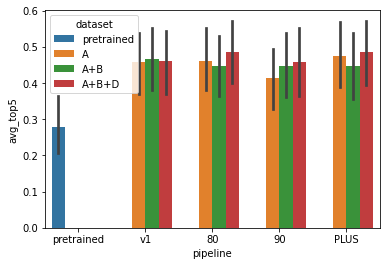

avg_top10


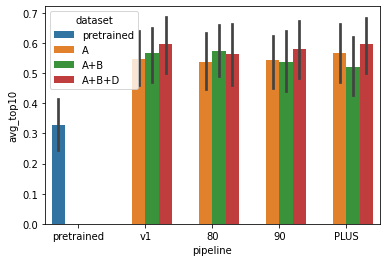

avg_top100


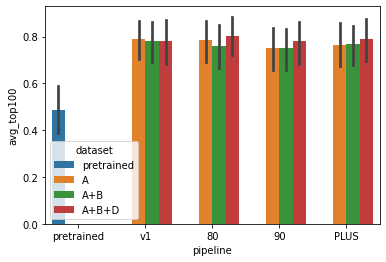

avg_top1000


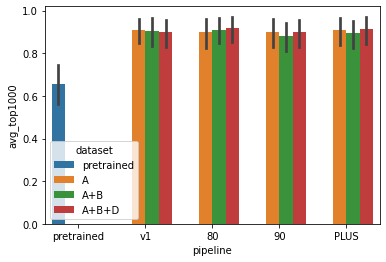

avg_rank


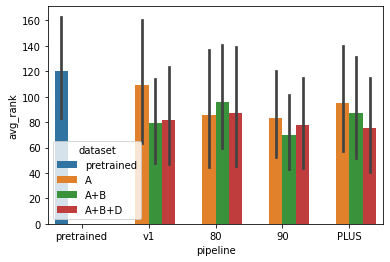

avg_distance


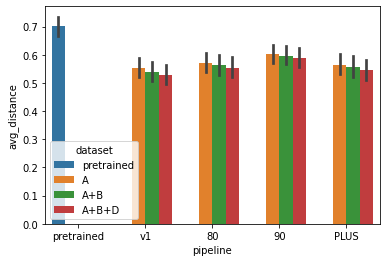

In [46]:
x = analogy_res_4 
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

x = x[x.dim == 300]

for col in analogy_res.filter(regex='avg'):
    print(col)
    
    sns.barplot(data=x.reset_index(), y=col, x='pipeline', hue='dataset', order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

### Compare analogy performance across Themes, 300d vectors only

avg_top10


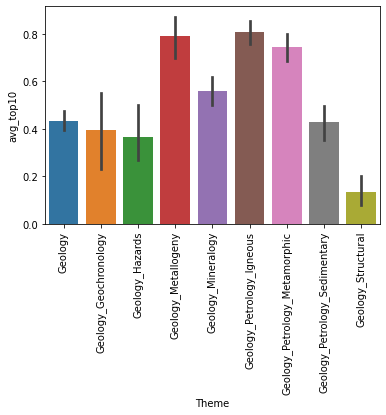

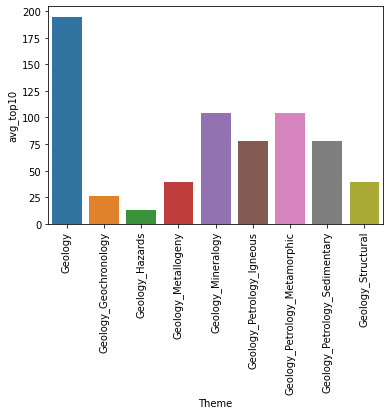

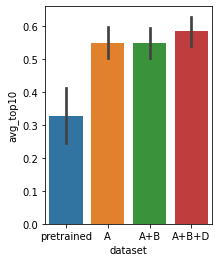

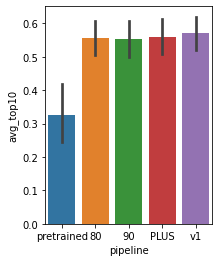

avg_rank


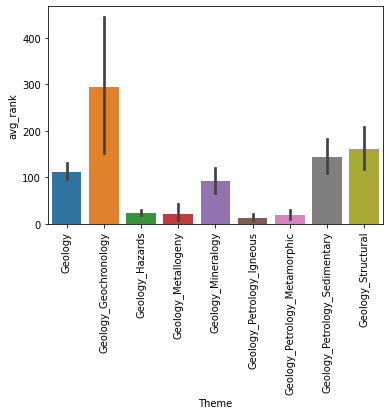

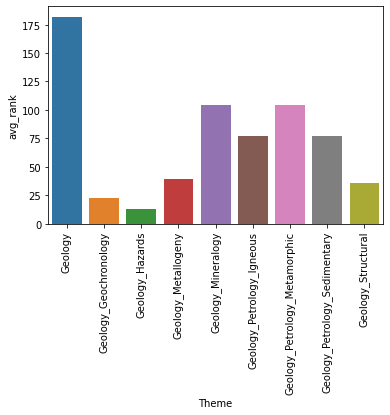

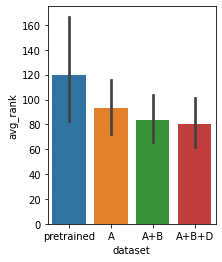

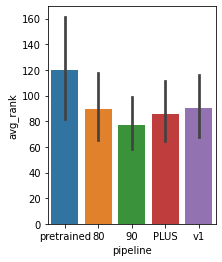

In [109]:
x = analogy_res_4 
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

x = x[x.dim == 300]

for col in analogy_res.filter(regex='avg_top10$|avg_rank'):
    print(col)

    fig = plt.figure(figsize=(6,4))
    sns.barplot(data=x.reset_index(), y=col, x='Theme') #, ax=ax1)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(6,4))
    sns.barplot(data=x.reset_index().groupby('Theme').count().reset_index(), y=col, x='Theme') #, ax=ax1)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)
    plt.show()    
    
    fig = plt.figure(figsize=(3,4))
    sns.barplot(data=x.reset_index(), y=col, x='dataset') #, ax=ax3)
    plt.show()
    
    fig = plt.figure(figsize=(3,4))
    sns.barplot(data=x.reset_index(), y=col, x='pipeline') #, ax=ax4)
    plt.show()


### Investigate whether performance on the analogies differs against the word in the quartet that we try to predict

It shouldn't. This is to check if there is significant bias in the dataset construction. 

In [110]:
analogy_res[analogy_res.Theme == 'Geology_Hazards'][['a', 'x', 'b', 'y']].drop_duplicates()

,a,x,b,y
20,Eruption,Volcano,Wave,Tsunami


Ideally we want all the bar graphs to look identical 

,Unnamed: 0,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,...,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present,model,dataset,pipeline,dim
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,0.50,1.0,133.50,0.442645,4,1.0,glove.dA_full_dB_dD.v1,dA_full_dB_dD,v1,50
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,0.50,1.0,88.00,0.452587,4,1.0,glove.dA_full_dB_dD.80,dA_full_dB_dD,80,50
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,1.00,1.0,30.50,0.426219,4,1.0,glove.dA_full_dB_dD.90,dA_full_dB_dD,90,50
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,0.75,1.0,107.75,0.432858,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,1.00,1.0,29.00,0.601066,4,1.0,glove.dA_full_dB_dD.v1.300,dA_full_dB_dD,v1,300
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,0.0,...,1.00,1.0,36.25,0.651954,4,1.0,glove.dA_full_dB_dD.80.300,dA_full_dB_dD,80,300
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,1.0,1.0,...,1.00,1.0,10.50,0.623348,4,1.0,glove.dA_full_dB_dD.90.300,dA_full_dB_dD,90,300
20,20,Analogy,Geology_Hazards,Eruption,Volcano,Wave,Tsunami,0.0,0.0,1.0,...,1.00,1.0,24.50,0.618263,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


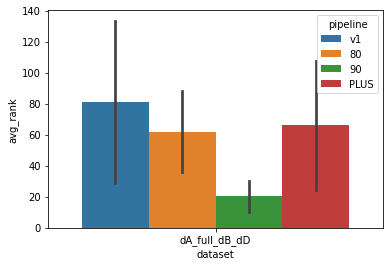

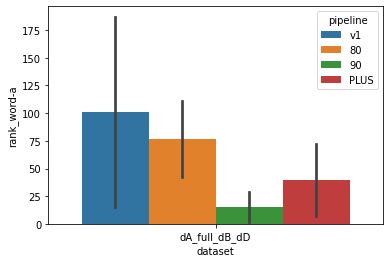

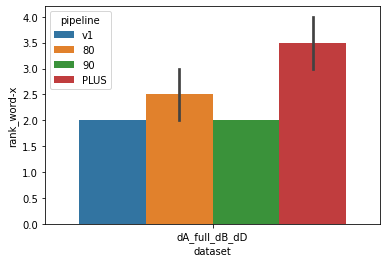

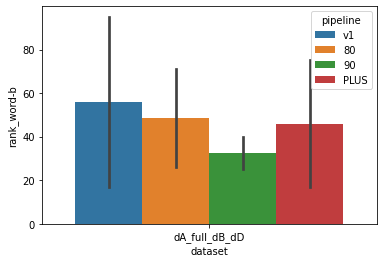

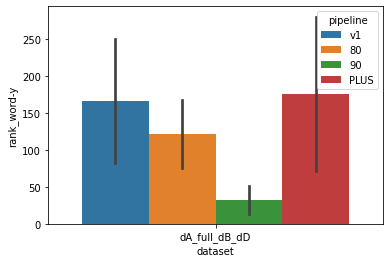

In [118]:
x = analogy_res[(analogy_res.Theme == 'Geology_Hazards') &
           ((analogy_res.model == 'glove_6B.300d') | (analogy_res.model.str.contains('glove.dA_full_dB_dD'))) ]

display(x)

sns.barplot(data=x, y = 'avg_rank', x = 'dataset', hue='pipeline')
plt.show()
sns.barplot(data=x, y = 'rank_word-a', x = 'dataset', hue='pipeline')
plt.show()
sns.barplot(data=x, y = 'rank_word-x', x = 'dataset', hue='pipeline')
plt.show()
sns.barplot(data=x, y = 'rank_word-b', x = 'dataset', hue='pipeline')
plt.show()
sns.barplot(data=x, y = 'rank_word-y', x = 'dataset', hue='pipeline')
plt.show()

### Compare performance across Theme

Incase you're interested... the graphs can get a bit messy

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = analogy_res.set_index(['model', 'dataset', 'dim', 'pipeline', 'Theme']).filter(regex='avg_|perc_present')
#display(x)
#display(x.style.background_gradient(cmap='Blues'))

melted = x.reset_index().melt(id_vars=['model', 'dataset', 'dim', 'pipeline', 'Theme'])
#display(melted)

#
melted = melted[melted.dim == 300]
g = sns.FacetGrid(melted,col='variable', sharey=False, col_wrap=2, height=4, aspect=2)
g.map_dataframe(sns.barplot, x='pipeline', y='value', hue='Theme') #, hue='dim')
g.add_legend()
plt.show()

Average first across theme, plot only the top1 and top5...

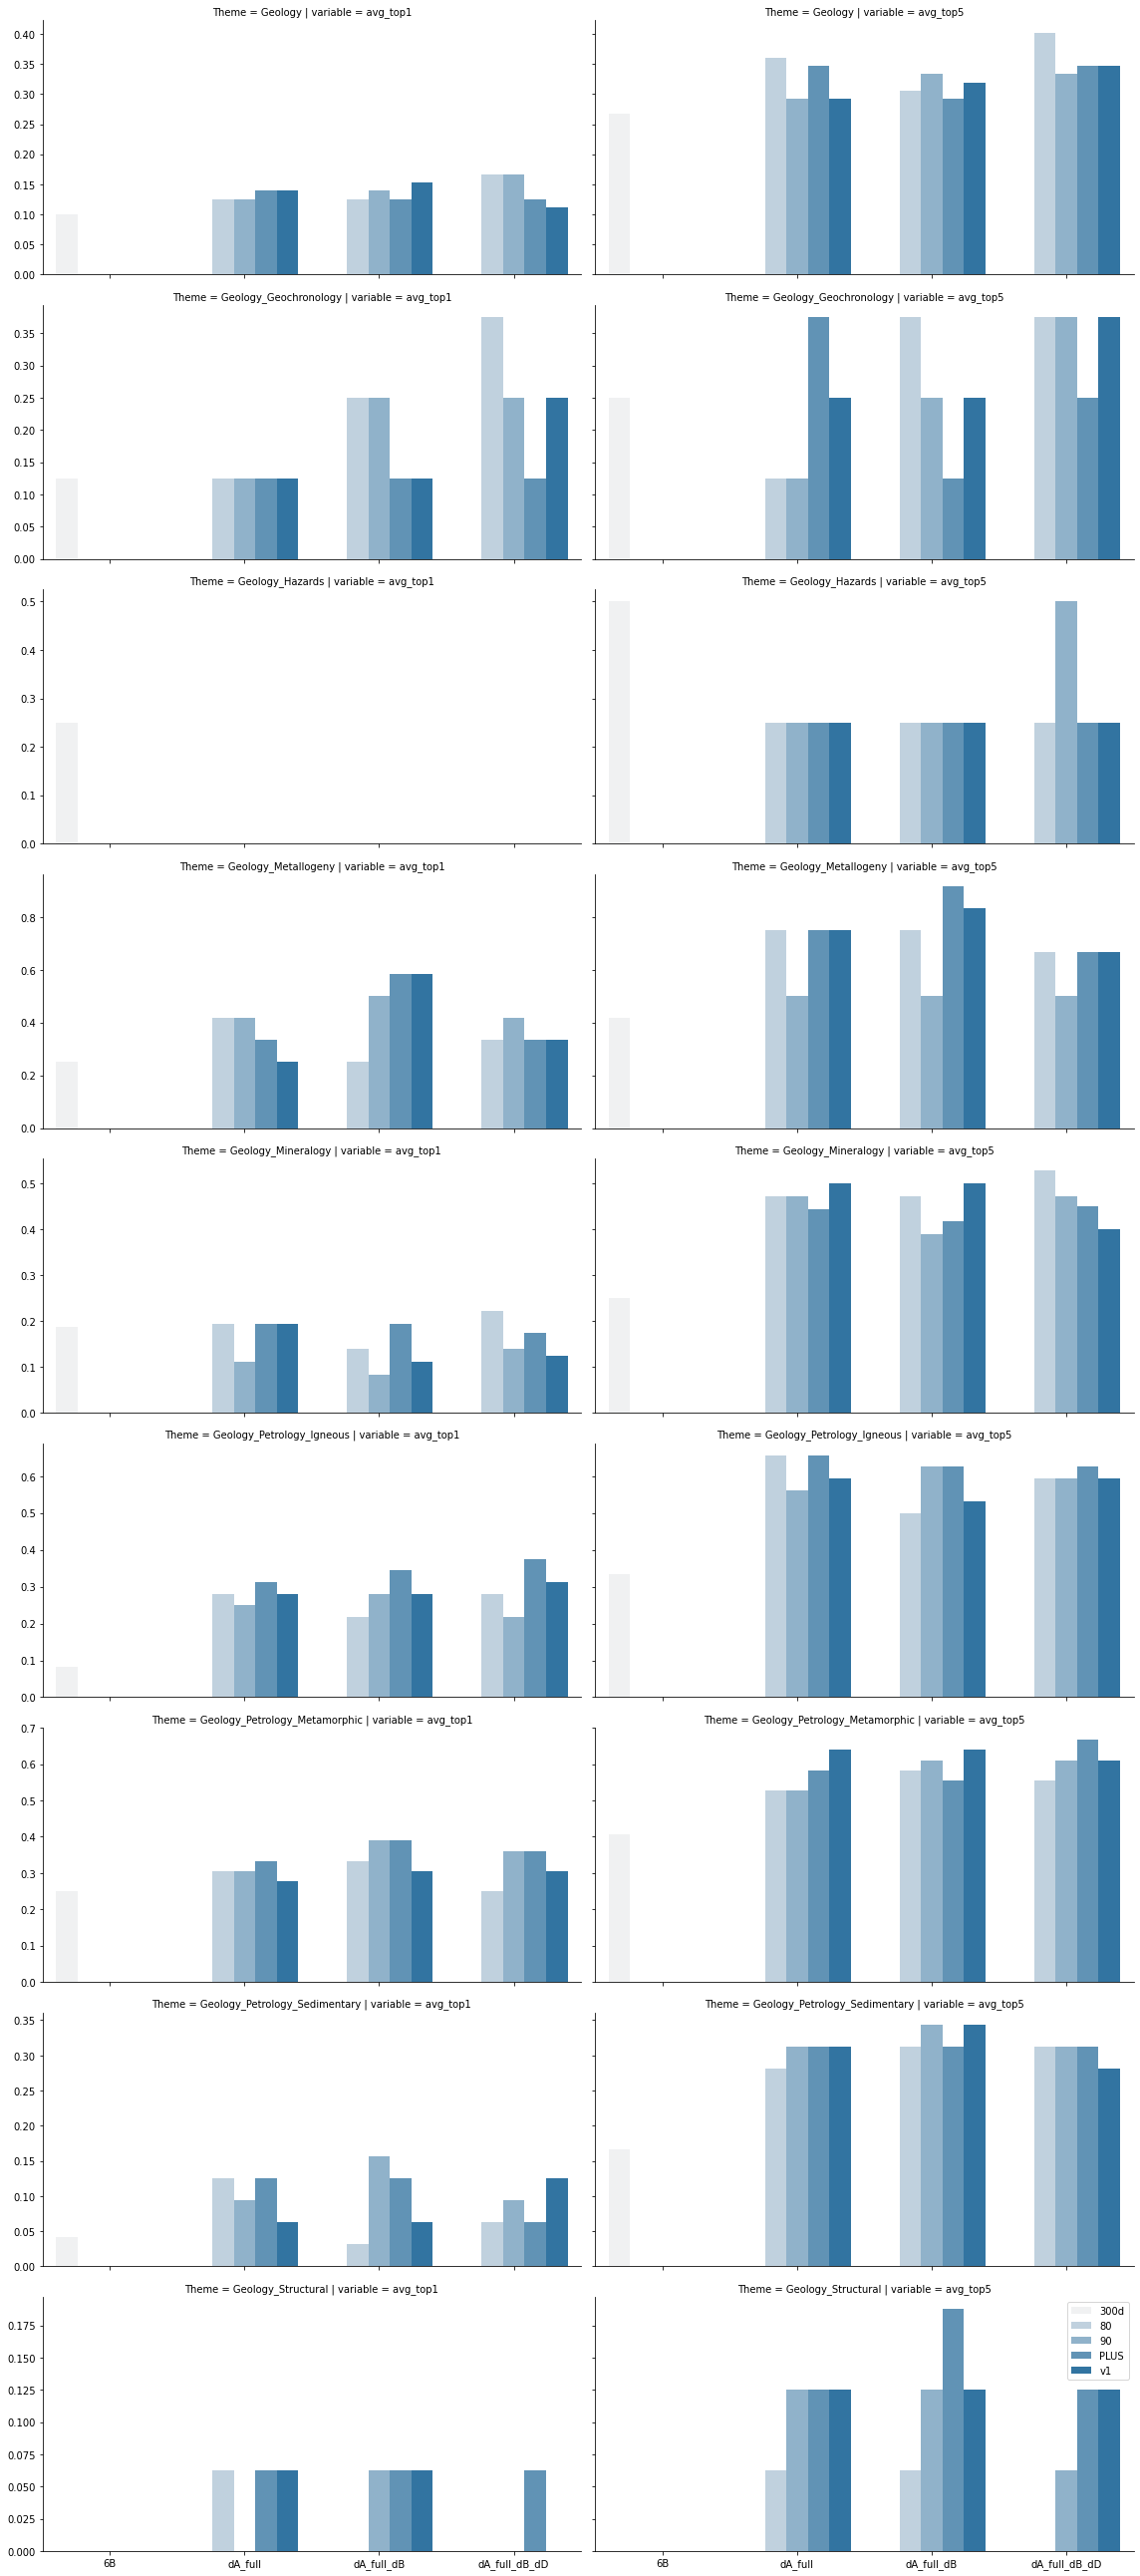

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

x = analogy_res.groupby(['model', 'dataset', 'dim', 'pipeline', 'Theme']).mean().filter(regex='avg_|n_present|perc_present')

melted = x.reset_index().melt(id_vars=['model', 'dataset', 'dim', 'pipeline', 'Theme'])

with sns.plotting_context(font_scale=4):
    g = sns.FacetGrid(melted[(melted.dim == 300) & melted.variable.isin(['avg_top1', 'avg_top5'])], row='Theme',  col='variable', sharey='row', height=4, aspect=2) # sharey='row', margin_titles=True)
    g.map_dataframe(sns.barplot, x='dataset', y='value', dodge=True,hue='pipeline',)
    plt.legend()
    plt.show()


### Find the specific analogy tests for which two specific models have all the words in their vocabs

#### A+B+D PLUS 50d vs A+B+D PLUS 300d

In [90]:
x = analogy_res[(analogy_res.model=='glove.dA_full_dB_dD.PLUS') | (analogy_res.model == 'glove.dA_full_dB_dD.PLUS.300')]
display(x)
x = x.set_index(['Theme', 'a','x','b','y','model']).unstack('model')

display(x[(x[('avg_top10', 'glove.dA_full_dB_dD.PLUS')] > x[('avg_top10', 'glove.dA_full_dB_dD.PLUS.300')]) & 
          (x[('n_present', 'glove.dA_full_dB_dD.PLUS')] == 4)])

display(x[(x[('avg_top10', 'glove.dA_full_dB_dD.PLUS')] < x[('avg_top10', 'glove.dA_full_dB_dD.PLUS.300')]) & 
          (x[('n_present', 'glove.dA_full_dB_dD.PLUS')] == 4)].filter(regex='top'))

,Unnamed: 0,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,...,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present,model,dataset,pipeline,dim
0,0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,0.0,1.0,1.0,...,1.00,1.00,4.00,0.298349,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
1,1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,0.0,0.0,0.0,...,0.00,0.00,NaN,0.689756,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
2,2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,...,0.50,0.50,13.00,0.510177,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
3,3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,1.0,1.0,1.0,...,1.00,1.00,11.25,0.267466,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
4,4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,0.0,1.0,1.0,...,1.00,1.00,36.00,0.387227,4,1.0,glove.dA_full_dB_dD.PLUS,dA_full_dB_dD,PLUS,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial,0.0,0.0,0.0,...,0.00,0.50,331.00,0.770319,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
62,62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated,0.0,0.0,1.0,...,0.75,1.00,76.00,0.700947,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
63,63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression,0.0,0.0,0.0,...,0.25,0.25,34.00,0.783191,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
64,64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar,0.0,1.0,1.0,...,0.75,1.00,70.50,0.535395,4,1.0,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


Unnamed: 0  \
model                                                 glove.dA_full_dB_dD.PLUS   
Theme   a       x           b            y                                       
Geology Abitibi Superior    Stikinia     Cordilleran                         0   
        Erosion Sedimentary Melting      Igneous                             7   
        Optical Microscope  Spectrometer Geochemistry                       13   

                                                                                    \
model                                                 glove.dA_full_dB_dD.PLUS.300   
Theme   a       x           b            y                                           
Geology Abitibi Superior    Stikinia     Cordilleran                             0   
        Erosion Sedimentary Melting      Igneous                                 7   
        Optical Microscope  Spectrometer Geochemistry                           13   

                                                                          Task  \
model                                                 glove.dA_full_dB_dD.PLUS   
Theme   a       x           b            y                                       
Geology Abitibi Superior    Stikinia     Cordilleran                   Analogy   
        Erosion Sedimentary Melting      Igneous                       Analogy   
        Optical Microscope  Spectrometer Geochemistry                  Analogy   

                                                                                    \
model                                                 glove.dA_full_dB_dD.PLUS.300   
Theme   a       x           b            y                                           
Geology Abitibi Superior    Stikinia     Cordilleran                       Analogy   
        Erosion Sedimentary Melting      Igneous                           Analogy   
        Optical Microscope  Spectrometer Geochemistry                      Analogy   

                                                                   top1_word-a  \
model                                                 glove.dA_full_dB_dD.PLUS   
Theme   a       x           b            y                                       
Geology Abitibi Superior    Stikinia     Cordilleran                       0.0   
        Erosion Sedimentary Melting      Igneous                           0.0   
        Optical Microscope  Spectrometer Geochemistry                      0.0   

                                                                                    \
model                                                 glove.dA_full_dB_dD.PLUS.300   
Theme   a       x           b            y                                           
Geology Abitibi Superior    Stikinia     Cordilleran                           0.0   
        Erosion Sedimentary Melting      Igneous                               0.0   
        Optical Microscope  Spectrometer Geochemistry                          0.0   

                                                                   top5_word-a  \
model                                                 glove.dA_full_dB_dD.PLUS   
Theme   a       x           b            y                                       
Geology Abitibi Superior    Stikinia     Cordilleran                       1.0   
        Erosion Sedimentary Melting      Igneous                           0.0   
        Optical Microscope  Spectrometer Geochemistry                      0.0   

                                                                                    \
model                                                 glove.dA_full_dB_dD.PLUS.300   
Theme   a       x           b            y                                           
Geology Abitibi Superior    Stikinia     Cordilleran                           0.0   
        Erosion Sedimentary Melting      Igneous                               0.0   
        Optical Microscope  Spectrometer Geochemistry                          0.0   

                            

top1_word-a  \
model                                                                              glove.dA_full_dB_dD.PLUS   
Theme                         a         x              b             y                                        
Geology                       Core      Inner          Crust         Outer                              0.0   
                              Diverging Ridge          Converging    Mountain                           0.0   
                              Drumlin   Glacier        Scarp         Fault                              0.0   
                              Earth     Planet         Sun           Star                               0.0   
                              Fluid     Vein           Magma         Dyke                               0.0   
                              Fossil    Paleontology   Water         Hydrology                          0.0   
                              Moho      Crust          Asthenosphere Mantle                             0.0   
                              Rigid     Lithosphere    Convecting    Asthenosphere                      0.0   
                              Superior  Province       Abitibi       Terrane                            0.0   
Geology_Hazards               Eruption  Volcano        Wave          Tsunami                            0.0   
Geology_Mineralogy            Diamond   Graphite       Kyanite       Sillimanite                        0.0   
                              Diopside  Pyroxene       Actinolite    Amphibole                          0.0   
                              Green     Chlorite       Black         Pyroxene                           0.0   
                              Magnetite Magnetic       Graphite      Conductive                         0.0   
                                        Oxide          Calcite       Carbonate                          0.0   
                              Muscovite Phyllosilicate Epidote       Sorosilicate                       0.0   
                              Sericite  Feldspar       Serpentine    Olivine                            0.0   
Geology_Petrology_Igneous     Granite   Plutonic       Basalt        Volcanic                           0.0   
Geology_Petrology_Metamorphic Albite    Greenschist    Anorthite     Amphibolite                        0.0   
                              Foliated  Gneiss         Massive       Granite                            0.0   
                              Gneiss    Granite        Marble        Limestone                          1.0   
Geology_Petrology_Sedimentary Angular   Breccia        Rounded       Conglomerate                       0.0   
                              Quartz    Sandstone      Feldspar      Arkose                             0.0   
                              Sandstone Trap           Shale         Source                             0.0   
Geology_Structural            Gouge     Unconsolidated Cataclasite   Consolidated                       0.0   

                                                                                                                 \
model                                                                              glove.dA_full_dB_dD.PLUS.300   
Theme                         a         x              b             y                                            
Geology                       Core      Inner          Crust         Outer                                  0.0   
                              Diverging Ridge          Converging    Mountain                               1.0   
                              Drumlin   Glacier        Scarp         Fault                                  0.0   
                              Earth     Planet         Sun           Star                                   0.0   
                              Fluid     Vein           Magma         Dyke                                   0.0   
                              Fossil    Paleontology   Water       

#### Glove pretrained 300d vs A+B+D PLUS 300d

In [87]:
x = analogy_res[(analogy_res.model=='glove.6B.300d') | (analogy_res.model == 'glove.dA_full_dB_dD.PLUS.300')]
display(x)
x = x.set_index(['Theme', 'a','x','b','y','model']).unstack('model')

display(x[(x[('avg_top10', 'glove.6B.300d')] > x[('avg_top10', 'glove.dA_full_dB_dD.PLUS.300')]) & 
          (x[('n_present', 'glove.6B.300d')] == 4)])

display(x[(x[('avg_top10', 'glove.6B.300d')] < x[('avg_top10', 'glove.dA_full_dB_dD.PLUS.300')]) & 
          (x[('n_present', 'glove.6B.300d')] == 4)].filter(regex='top'))

,Unnamed: 0,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,...,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present,model,dataset,pipeline,dim
0,0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0.75,glove.6B.300d,6B,300d,300
1,1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0.75,glove.6B.300d,6B,300d,300
2,2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,...,0.50,1.00,117.75,0.624785,4,1.00,glove.6B.300d,6B,300d,300
3,3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,0.0,0.0,0.0,...,0.00,0.25,206.00,0.822788,4,1.00,glove.6B.300d,6B,300d,300
4,4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,0.0,1.0,1.0,...,1.00,1.00,3.00,0.588388,4,1.00,glove.6B.300d,6B,300d,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial,0.0,0.0,0.0,...,0.00,0.50,331.00,0.770319,4,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
62,62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated,0.0,0.0,1.0,...,0.75,1.00,76.00,0.700947,4,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
63,63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression,0.0,0.0,0.0,...,0.25,0.25,34.00,0.783191,4,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
64,64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar,0.0,1.0,1.0,...,0.75,1.00,70.50,0.535395,4,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


Unnamed: 0  \
model                                                                      glove.6B.300d   
Theme                         a         x           b          y                           
Geology                       Diverging Ridge       Converging Mountain                4   
                              Earth     Planet      Sun        Star                    6   
                              Erosion   Sedimentary Melting    Igneous                 7   
Geology_Petrology_Metamorphic Albite    Greenschist Anorthite  Amphibolite            45   
Geology_Petrology_Sedimentary Limestone Chemical    Sandstone  Clastic                58   

                                                                                                         \
model                                                                      glove.dA_full_dB_dD.PLUS.300   
Theme                         a         x           b          y                                          
Geology                       Diverging Ridge       Converging Mountain                               4   
                              Earth     Planet      Sun        Star                                   6   
                              Erosion   Sedimentary Melting    Igneous                                7   
Geology_Petrology_Metamorphic Albite    Greenschist Anorthite  Amphibolite                           45   
Geology_Petrology_Sedimentary Limestone Chemical    Sandstone  Clastic                               58   

                                                                                    Task  \
model                                                                      glove.6B.300d   
Theme                         a         x           b          y                           
Geology                       Diverging Ridge       Converging Mountain          Analogy   
                              Earth     Planet      Sun        Star              Analogy   
                              Erosion   Sedimentary Melting    Igneous           Analogy   
Geology_Petrology_Metamorphic Albite    Greenschist Anorthite  Amphibolite       Analogy   
Geology_Petrology_Sedimentary Limestone Chemical    Sandstone  Clastic           Analogy   

                                                                                                         \
model                                                                      glove.dA_full_dB_dD.PLUS.300   
Theme                         a         x           b          y                                          
Geology                       Diverging Ridge       Converging Mountain                         Analogy   
                              Earth     Planet      Sun        Star                             Analogy   
                              Erosion   Sedimentary Melting    Igneous                          Analogy   
Geology_Petrology_Metamorphic Albite    Greenschist Anorthite  Amphibolite                      Analogy   
Geology_Petrology_Sedimentary Limestone Chemical    Sandstone  Clastic                          Analogy   

                                                                             top1_word-a  \
model                                                                      glove.6B.300d   
Theme                         a         x           b          y                           
Geology                       Diverging Ridge       Converging Mountain              0.0   
                              Earth     Planet      Sun        Star                  1.0   
                              Erosion   Sedimentary Melting    Igneous               0.0   
Geology_Petrology_Metamorphic Albite    Greenschist Anorthite  Amphibolite           0.0   
Geology_Petrology_Sedimentary Limestone Chemical    Sandstone  Clastic               0.0   

                                                                                                         \
model                                         

top1_word-a  \
model                                                                                 glove.6B.300d   
Theme                         a          x               b               y                            
Geology                       Deposition Sedimentation   Crystallization Magmatism              0.0   
                              Drumlin    Glacier         Scarp           Fault                  0.0   
                              Fluid      Vein            Magma           Dyke                   0.0   
                              Fossil     Paleontology    Water           Hydrology              0.0   
                              Moho       Crust           Asthenosphere   Mantle                 0.0   
                              Superior   Province        Abitibi         Terrane                0.0   
                              Veins      Hydrothermal    Dykes           Magmatic               0.0   
Geology_Geochronology         Superior   Archean         Grenville       Proterozoic            0.0   
Geology_Metallogeny           Copper     Porphyry        Lithium         Pegmatite              0.0   
                              Gold       Hydrothermal    Nickel          Magmatic               0.0   
Geology_Mineralogy            Diopside   Pyroxene        Actinolite      Amphibole              0.0   
                              Green      Chlorite        Black           Pyroxene               0.0   
                              Magnetite  Magnetic        Graphite        Conductive             0.0   
                              Quartz     Granite         Olivine         Peridotite             0.0   
                              Sulphide   Conductive      Granite         Resistive              0.0   
Geology_Petrology_Igneous     Basalt     Mafic           Andesite        Intermediate           0.0   
                              Cooling    Crystallization Heating         Melting                0.0   
                              Discordant Dyke            Concordant      Sill                   0.0   
                              Granite    Intrusive       Rhyolite        Extrusive              0.0   
                                         Plutonic        Basalt          Volcanic               0.0   
Geology_Petrology_Metamorphic Chlorite   Greenschist     Biotite         Amphibolite            0.0   
                              Foliated   Gneiss          Massive         Granite                0.0   
                              Gneiss     Granite         Marble          Limestone              0.0   
                              Granite    Igneous         Gneiss          Metamorphic            0.0   
                                         Isotropic       Gneiss          Anisotropic            0.0   
                              Shale      Slate           Sandstone       Quartzite              0.0   
Geology_Petrology_Sedimentary Angular    Breccia         Rounded         Conglomerate           0.0   
                              Coarse     Sandstone       Fine            Mudstone               0.0   
                              Sandstone  Trap            Shale           Source                 0.0   
Geology_Structural            Plunge     Lineation       Strike          Planar                 0.0   

                                                                                                                    \
model                                                                                 glove.dA_full_dB_dD.PLUS.300   
Theme                         a          x               b               y                                           
Geology                       Deposition Sedimentation   Crystallization Magmatism                             1.0   
                              Drumlin    Glacier         Scarp           Fault                                 0.0   
                              Fluid      Vein            Magma           Dyke                     

## Relatedness 

When comparing relatedness tests, we have a couple of options. We can 
* average first across rowid (ie averaging for performance on all tests involving the original (a,a_sim) pair of words that are flagged as similar
* average first across test Type (intra-gradient etc.)
* average first across Theme

In this case, we probably want to average across rowid and consider performance differently for each test Type since some types might be harder than others. We probably want to average irrespective of Theme, since we care more about the individual test results than about performance on each Theme overall. 

In [5]:
format_func = lambda MODEL_NAME: f'relatedness_{MODEL_NAME}.csv'
rel_res = concat_files(format_func)
#with pd.option_context('display.max_rows', None):   
display(rel_res)

relatedness_glove.dA_full.v1.csv
relatedness_glove.dA_full_dB.v1.csv
relatedness_glove.dA_full_dB_dD.v1.csv
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/relatedness_glove.B.v1.csv'
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/relatedness_glove.D.v1.csv'
relatedness_glove.dA_full.80.csv
relatedness_glove.dA_full_dB.80.csv
relatedness_glove.dA_full_dB_dD.80.csv
relatedness_glove.dA_full.90.csv
relatedness_glove.dA_full_dB.90.csv
relatedness_glove.dA_full_dB_dD.90.csv
relatedness_glove.dA_full.PLUS.csv
relatedness_glove.dA_full_dB.PLUS.csv
relatedness_glove.dA_full_dB_dD.PLUS.csv
relatedness_glove.6B.300d.csv
relatedness_glove.6B.50d.csv
relatedness_glove.dA_full.v1.300.csv
relatedness_glove.dA_full_dB.v1.300.csv
relatedness_glove.dA_full_dB_dD.v1.300.csv
relatedness_glove.dA_full.80.300.csv
relatedness_glove.dA_full_dB.80.300.csv
relatedness_glove.dA_full_dB_dD.80.300.csv
relatedness_glove.d

,Unnamed: 0,a,a_sim,a_diff,Task,Theme,rowid,Type,Pass,model,dataset,pipeline,dim
0,0,Hadean,Archean,Proterozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50
1,1,Hadean,Archean,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,False,glove.dA_full.v1,dA_full,v1,50
2,2,Hadean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,False,glove.dA_full.v1,dA_full,v1,50
3,3,Archean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50
4,4,Proterozoic,Archean,Hadean,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222853,18,Spectrometry,Spectroscopy,Eletron,Relatedness,Methods,248,Intra-theme,NaN,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
222854,19,Spectrometry,Spectroscopy,Susceptibility,Relatedness,Methods,248,Intra-theme,True,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
222855,20,Spectrometry,Spectroscopy,Diffraction,Relatedness,Methods,248,Intra-theme,NaN,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
222856,21,Spectrometry,Spectroscopy,Gravity,Relatedness,Methods,248,Intra-theme,True,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


In [6]:
rel_res['score'] = rel_res.Pass.apply(lambda x: int(x == True))
rel_res['is_null_score'] = rel_res.Pass.apply(lambda x: int(pd.isnull(x)))

In [249]:
rel_res

,Unnamed: 0,a,a_sim,a_diff,Task,Theme,rowid,Type,Pass,model,dataset,pipeline,dim,score,is_null_score
0,0,Hadean,Archean,Proterozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50,1,0
1,1,Hadean,Archean,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,False,glove.dA_full.v1,dA_full,v1,50,0,0
2,2,Hadean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,False,glove.dA_full.v1,dA_full,v1,50,0,0
3,3,Archean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50,1,0
4,4,Proterozoic,Archean,Hadean,Relatedness,Geology_Geochronology_Eon,70,Gradient,True,glove.dA_full.v1,dA_full,v1,50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222853,18,Spectrometry,Spectroscopy,Eletron,Relatedness,Methods,248,Intra-theme,NaN,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300,0,1
222854,19,Spectrometry,Spectroscopy,Susceptibility,Relatedness,Methods,248,Intra-theme,True,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300,1,0
222855,20,Spectrometry,Spectroscopy,Diffraction,Relatedness,Methods,248,Intra-theme,NaN,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300,0,1
222856,21,Spectrometry,Spectroscopy,Gravity,Relatedness,Methods,248,Intra-theme,True,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300,1,0


### Get the list of all the tests for which words are present for all models 

This operation takes a long time so we're going to save it to a local file that we can load from later

In [ ]:
y = rel_res 
y_dfs = []
for gname, group in y.groupby(['a', 'a_sim', 'a_diff', 'Task', 'Theme', 'rowid', 'Type']):
    if group.is_null_score.max() == 0:
        y_dfs.append(group)
    
y_dfs2 = pd.concat(y_dfs)
y_dfs2.to_parquet('rel_present_df.parquet')

### Display the relatedness test scores for all models across test Type in a coloured table

In [269]:
x[['Gradient', 'Intra-theme', 'Outra-theme']].style.background_gradient(cmap='Blues', axis=0)


### Display the relatedness scores for all models, considering only tests for which all models have all words in their vocabularies

In [272]:
x = y_dfs2.copy()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')
x = x.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim', 'rowid']).mean().groupby(['Type', 'dataset', 'pipeline', 'dim']).mean()[['score', 'is_null_score']] #value_count(normalize=True)


x = x.unstack('Type')
x.columns = x.columns.swaplevel()
x[['Gradient', 'Intra-theme', 'Outra-theme']].style.background_gradient(cmap='Blues', axis=0)


### Plot relatedness scores across pipeline and dataset comparing 50d vs 300d models

,Type,model,dataset,pipeline,dim,Unnamed: 0,rowid,score,is_null_score
0,Gradient,glove.6B.300d,pretrained,pretrained,300,987.50000,83.874494,0.361842,0.514170
1,Gradient,glove.6B.50d,pretrained,pretrained,50,987.50000,83.874494,0.340081,0.514170
2,Gradient,glove.dA_full.80,A,80,50,987.50000,83.874494,0.744433,0.034413
3,Gradient,glove.dA_full.80.300,A,80,300,987.50000,83.874494,0.752024,0.034413
4,Gradient,glove.dA_full.90,A,90,50,987.50000,83.874494,0.596154,0.172065
...,...,...,...,...,...,...,...,...,...
73,Outra-theme,glove.dA_full_dB_dD.90.300,A+B+D,90,300,190.78331,129.338826,0.789879,0.138892
74,Outra-theme,glove.dA_full_dB_dD.PLUS,A+B+D,PLUS,50,190.78331,129.338826,0.812476,0.115653
75,Outra-theme,glove.dA_full_dB_dD.PLUS.300,A+B+D,PLUS,300,190.78331,129.338826,0.824122,0.115653
76,Outra-theme,glove.dA_full_dB_dD.v1,A+B+D,v1,50,190.78331,129.338826,0.813861,0.115653


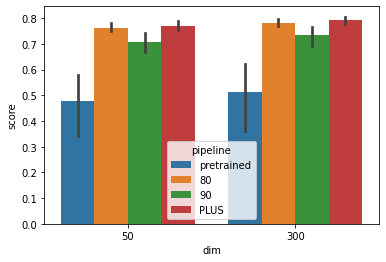

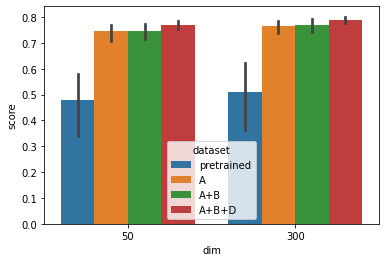

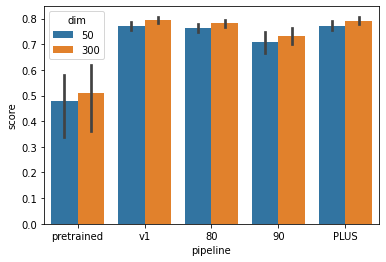

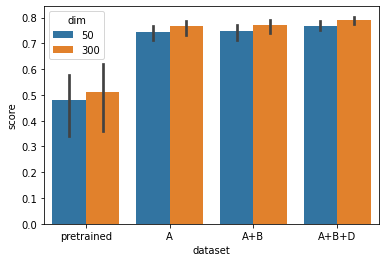

In [53]:
x = rel_res.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

display(x)
sns.barplot(data=x.reset_index(), y='score', x='dim', hue='pipeline', hue_order=['pretrained', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='dim', hue='dataset') #, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()

### Plot relatedness scores across pipeline and dataset, comparing across 300d and 50d, average first across rowid (ideal)

,Type,model,dataset,pipeline,dim,rowid,Unnamed: 0,score,is_null_score
0,Gradient,glove.6B.300d,pretrained,pretrained,300,70,3.500000,0.750000,0.000000
1,Gradient,glove.6B.300d,pretrained,pretrained,300,71,823.500000,0.339461,0.553922
2,Gradient,glove.6B.300d,pretrained,pretrained,300,100,1659.500000,0.000000,0.950000
3,Gradient,glove.6B.300d,pretrained,pretrained,300,109,1680.500000,0.000000,1.000000
4,Gradient,glove.6B.300d,pretrained,pretrained,300,130,1685.500000,0.625000,0.000000
...,...,...,...,...,...,...,...,...,...
13255,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,244,207.500000,0.963942,0.036058
13256,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,245,207.500000,0.963942,0.036058
13257,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,246,207.500000,0.963942,0.036058
13258,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,247,206.750302,0.961399,0.036188


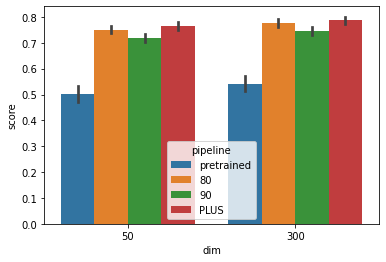

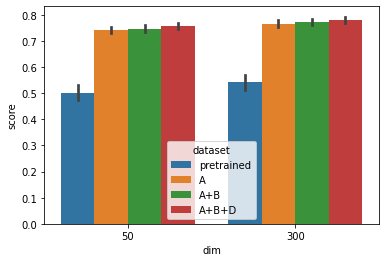

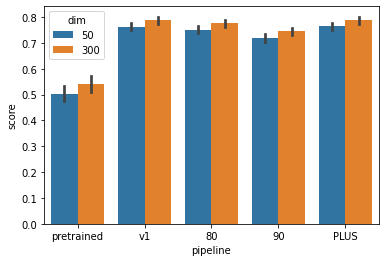

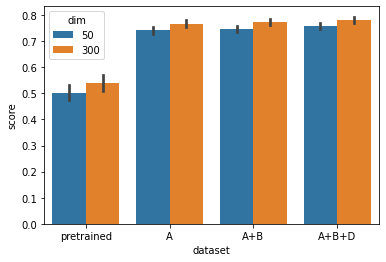

In [134]:
x = rel_res.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim', 'rowid']).mean() 
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

display(x)

sns.barplot(data=x.reset_index(), y='score', x='dim', hue='pipeline', hue_order=['pretrained', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='dim', hue='dataset') #, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()

### For the 300d models only, consider performance across test Type (and then across dataset, pipeline)
### ... and consider performance on dataset A+B+D only 

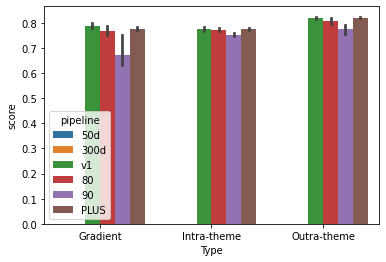

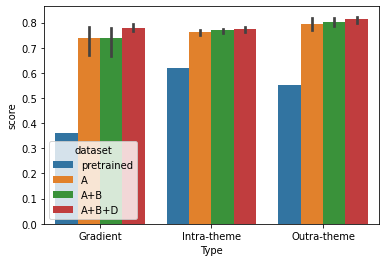

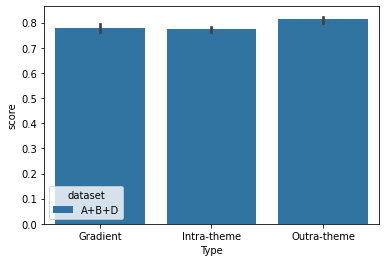

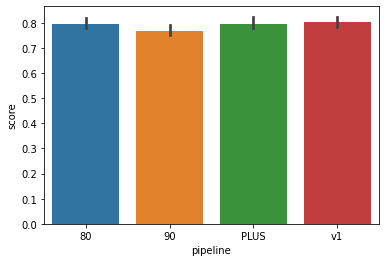

In [125]:
x = rel_res[rel_res.dim == 300]
x = x.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim']).mean() #value_count(normalize=True)
x = x.reset_index()

x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

#g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
sns.barplot(data=x.reset_index(), y='score', x='Type', hue='pipeline', hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
#g.add_legend()
plt.show()

#g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
sns.barplot(data=x.reset_index(), y='score', x='Type', hue='dataset')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
#g.add_legend()
plt.show()

x = x.reset_index()[x.reset_index().dataset == 'A+B+D']
sns.barplot(data=x.reset_index(), y='score', x='Type', hue='dataset')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
#g.add_legend()
plt.show()

#x = x.reset_index()[x.reset_index().dataset == 'A+B+D']
sns.barplot(data=x.reset_index(), y='score', x='pipeline') #, hue='pipeline')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
#g.add_legend()
plt.show()

### For the 300d models only, consider performance across test Type (and then across dataset, pipeline), considering only tests for which all models have all words in their vocab
### ... and consider performance on dataset A+B+D only 

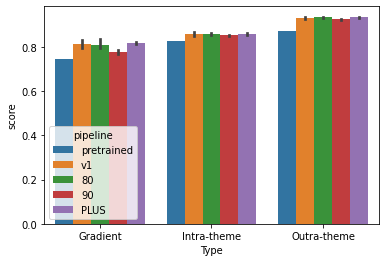

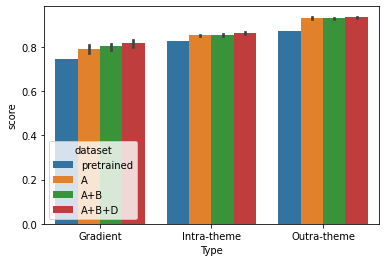

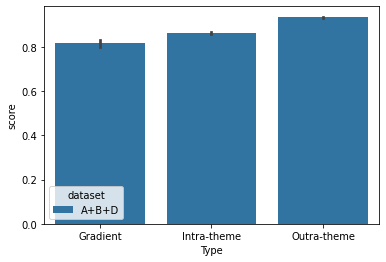

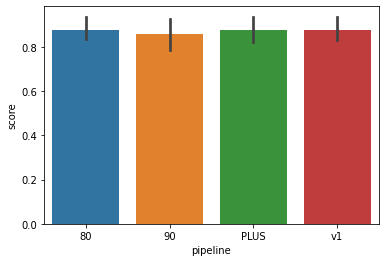

In [127]:
x = y_dfs2[y_dfs2.dim == 300]
x = x.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim']).mean() 
x = x.reset_index()

x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

sns.barplot(data=x.reset_index(), y='score', x='Type', hue='pipeline', hue_order=['pretrained', 'v1', '80', '90', 'PLUS'])
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='Type', hue='dataset')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
plt.show()

x = x.reset_index()[x.reset_index().dataset == 'A+B+D']
sns.barplot(data=x.reset_index(), y='score', x='Type', hue='dataset')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='pipeline') #, hue='pipeline')#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])

plt.show()

### Plot relatedness scores across dataset and pipeline, averaging first across rowid, considering only rows that have all words present for all models

,Type,model,dataset,pipeline,dim,rowid,Unnamed: 0,score,is_null_score
0,Gradient,glove.6B.300d,pretrained,pretrained,300,70,5.000000,1.000000,0.0
1,Gradient,glove.6B.300d,pretrained,pretrained,300,71,1010.500000,0.760989,0.0
2,Gradient,glove.6B.300d,pretrained,pretrained,300,100,1660.000000,0.000000,0.0
3,Gradient,glove.6B.300d,pretrained,pretrained,300,130,1685.500000,0.625000,0.0
4,Gradient,glove.6B.300d,pretrained,pretrained,300,137,1778.991071,0.714286,0.0
...,...,...,...,...,...,...,...,...,...
10213,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,244,207.905714,1.000000,0.0
10214,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,245,207.905714,1.000000,0.0
10215,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,246,207.905714,1.000000,0.0
10216,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,247,207.152080,0.997131,0.0


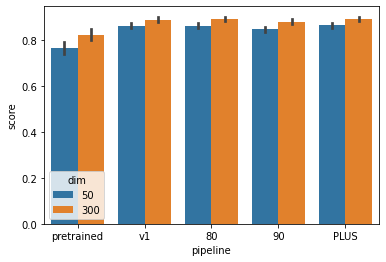

<AxesSubplot:xlabel='dataset', ylabel='score'>

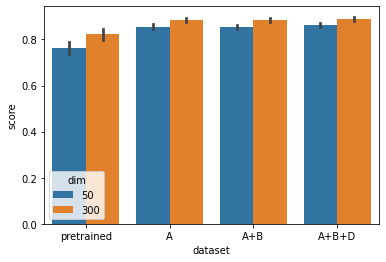

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt 
x = y_dfs2.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim', 'rowid']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

display(x)
# #g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
# sns.barplot(data=x.reset_index(), y='score', x='dim', hue='pipeline', hue_order=['pretrained', '80', '90', 'PLUS'])
# g.add_legend()
# plt.show()

# #g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
# sns.barplot(data=x.reset_index(), y='score', x='dim', hue='dataset') #, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
# g.add_legend()
# plt.show()

#g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
sns.barplot(data=x.reset_index(), y='score', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
#g.add_legend()
plt.show()

#g = sns.FacetGrid(data=x.reset_index(), col='dim',row='Type', aspect=2)
sns.barplot(data=x.reset_index(), y='score', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
#g.add_legend()

### Plot relatedness scores across dataset and pipeline, averaging first across rowid, and Theme considering only rows that have all words present for all models

,Type,model,dataset,pipeline,dim,rowid,Theme,Unnamed: 0,score,is_null_score
0,Gradient,glove.6B.300d,pretrained,pretrained,300,70,Geology_Geochronology_Eon,5.000000,1.000000,0.0
1,Gradient,glove.6B.300d,pretrained,pretrained,300,71,Geology_Geochronology_Period,1010.500000,0.760989,0.0
2,Gradient,glove.6B.300d,pretrained,pretrained,300,100,Geology_Mineralogy,1660.000000,0.000000,0.0
3,Gradient,glove.6B.300d,pretrained,pretrained,300,130,Geology_Petrology_Igneous,1685.500000,0.625000,0.0
4,Gradient,glove.6B.300d,pretrained,pretrained,300,137,Geology_Petrology_Igneous,1778.991071,0.714286,0.0
...,...,...,...,...,...,...,...,...,...,...
10213,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,244,Methods,207.905714,1.000000,0.0
10214,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,245,Methods,207.905714,1.000000,0.0
10215,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,246,Methods,207.905714,1.000000,0.0
10216,Outra-theme,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,247,Methods,207.152080,0.997131,0.0


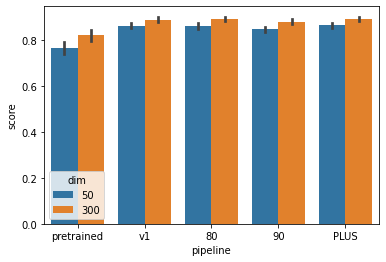

<AxesSubplot:xlabel='dataset', ylabel='score'>

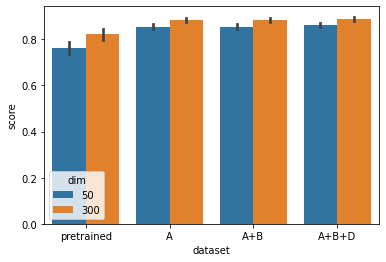

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
x = y_dfs2.groupby(['Type', 'model', 'dataset', 'pipeline', 'dim', 'rowid', 'Theme']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

display(x)

sns.barplot(data=x.reset_index(), y='score', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
plt.show()

sns.barplot(data=x.reset_index(), y='score', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])


### Plot scores across test Type vs pipeline and dataset directly, for 300d models

(array([0, 1, 2, 3]),
 [Text(0, 0, '6B'),
  Text(1, 0, 'dA_full'),
  Text(2, 0, 'dA_full_dB'),
  Text(3, 0, 'dA_full_dB_dD')])

<Figure size 1080x360 with 0 Axes>

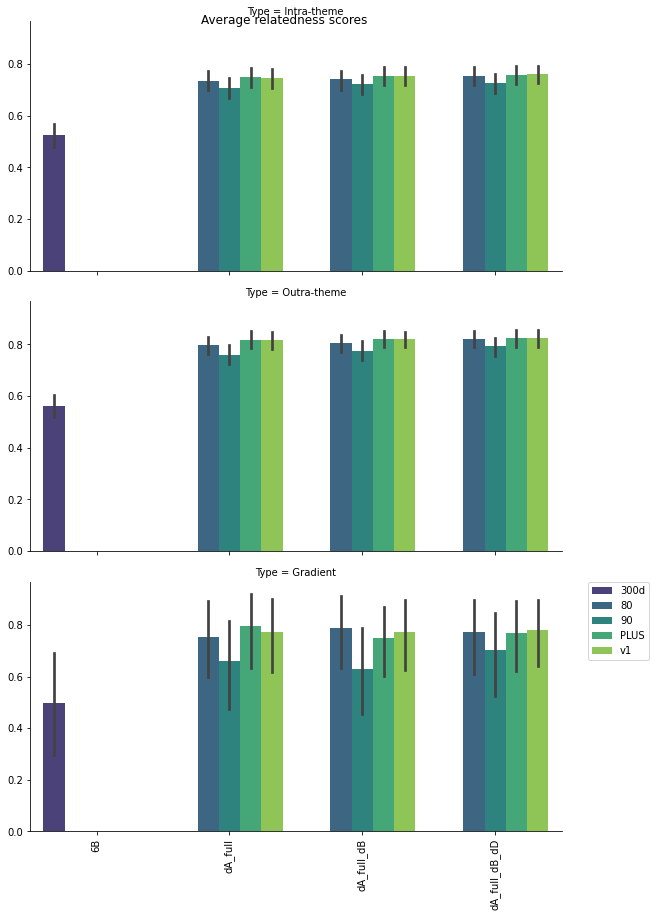

<Figure size 1080x360 with 0 Axes>

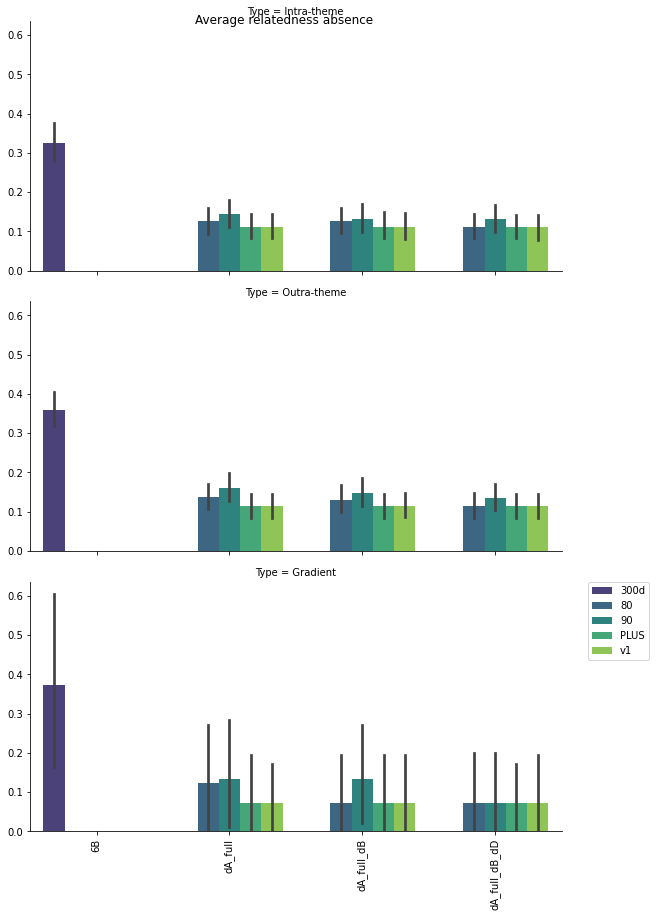

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
x = rel_res[rel_res.dim == 300]
g = sns.FacetGrid(data=x.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset']).mean().reset_index(),  
                  sharex=True, sharey=True, height=4, aspect=2, row='Type')
g.map_dataframe(sns.barplot,x='dataset', y='score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Average relatedness scores')
plt.xticks(rotation=90)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.FacetGrid(data=x.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset']).mean().reset_index(),  
                  sharex=True, sharey=True, height=4, aspect=2, row='Type')
g.map_dataframe(sns.barplot,x='dataset', y='is_null_score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Average relatedness absence')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '300d'),
  Text(1, 0, '80'),
  Text(2, 0, '90'),
  Text(3, 0, 'PLUS'),
  Text(4, 0, 'v1')])

<Figure size 1080x360 with 0 Axes>

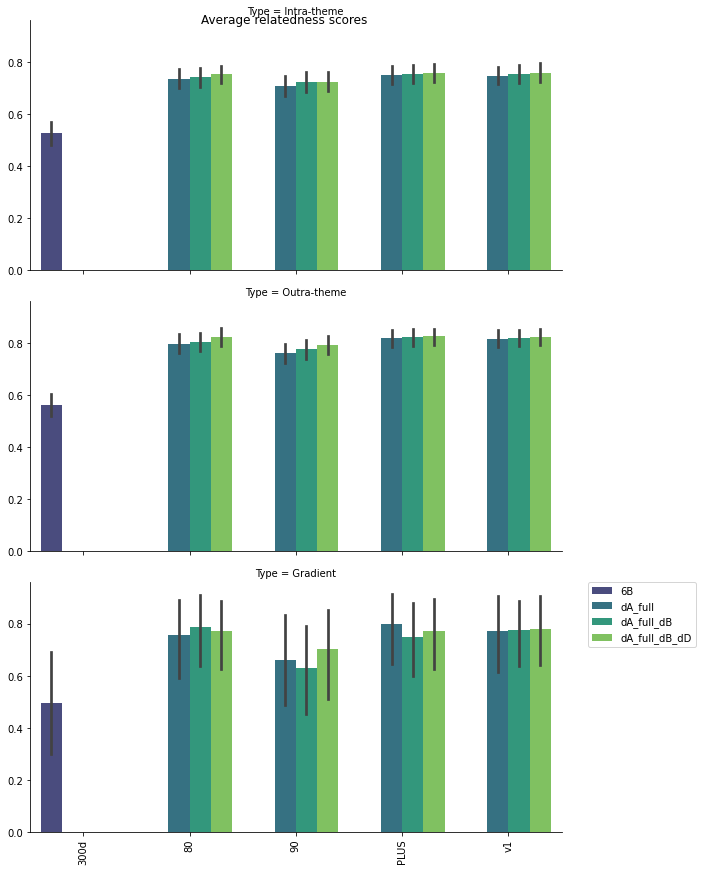

<Figure size 1080x360 with 0 Axes>

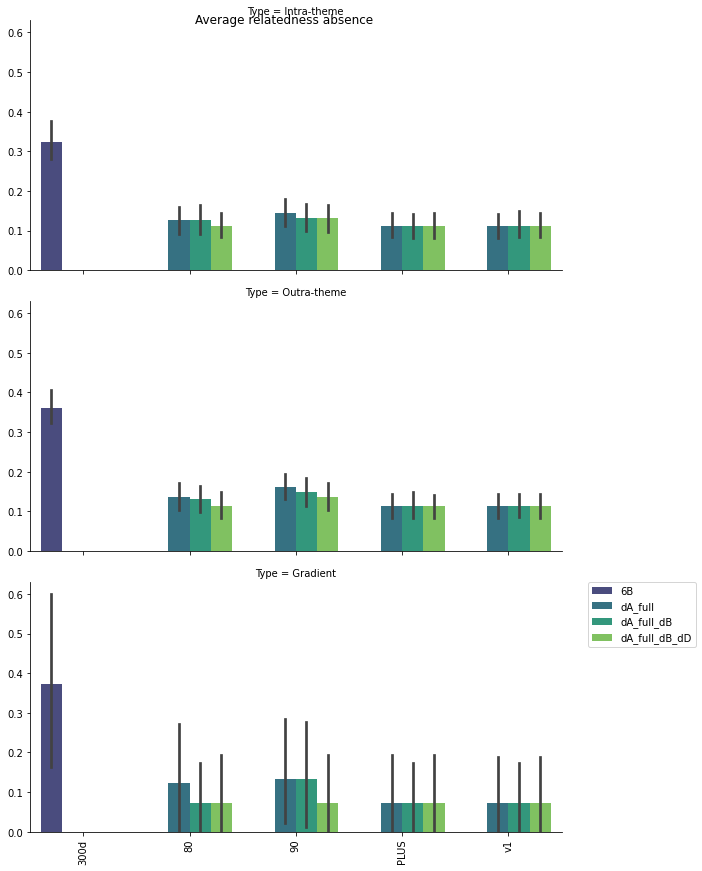

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
x = rel_res[rel_res.dim == 300]
g = sns.FacetGrid(data=x.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset']).mean().reset_index(),  
                  sharex=True, sharey=True, height=4, aspect=2, row='Type')
g.map_dataframe(sns.barplot,x='pipeline', y='score',hue='dataset', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Average relatedness scores')
plt.xticks(rotation=90)
#g.set(ylim=(0.7, 0.85))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.FacetGrid(data=x.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset']).mean().reset_index(),  
                  sharex=True, sharey=True, height=4, aspect=2, row='Type')
g.map_dataframe(sns.barplot,x='pipeline', y='is_null_score',hue='dataset', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Average relatedness absence')
plt.xticks(rotation=90)
#g.set(ylim=(0.58, 0.85))

### Plot scores across test Theme vs pipeline 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Earth System Science'),
  Text(1, 0, 'Geology_Geochronology_Carbonifeorus'),
  Text(2, 0, 'Geology_Geochronology_Eon'),
  Text(3, 0, 'Geology_Geochronology_Period'),
  Text(4, 0, 'Geology_Hazards'),
  Text(5, 0, 'Geology_Metallogeny'),
  Text(6, 0, 'Geology_Mineralogy'),
  Text(7, 0, 'Geology_Petrology_Igneous'),
  Text(8, 0, 'Geology_Petrology_Metamorphic'),
  Text(9, 0, 'Geology_Petrology_Sedimentary'),
  Text(10, 0, 'Geology_Structral'),
  Text(11, 0, 'Location_Metallogeny'),
  Text(12, 0, 'Location_Places'),
  Text(13, 0, 'Methods')])

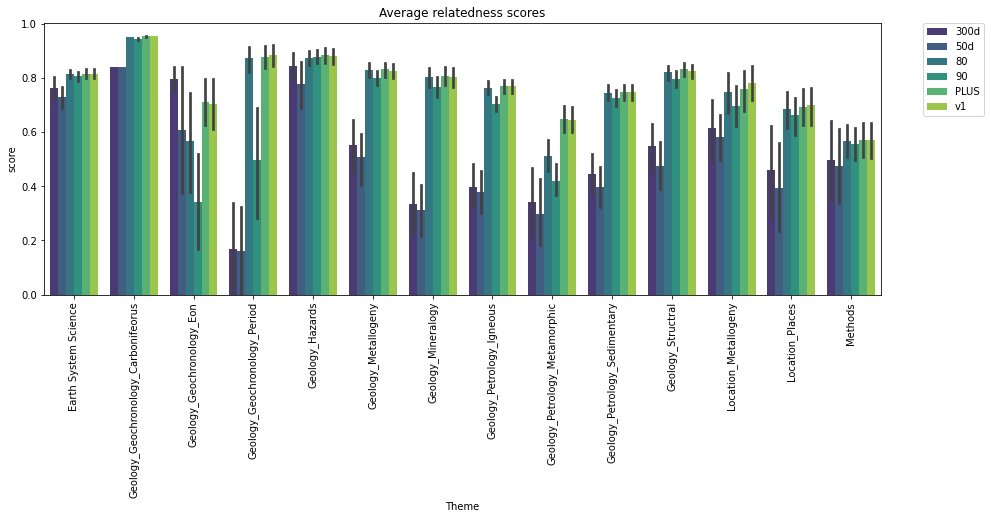

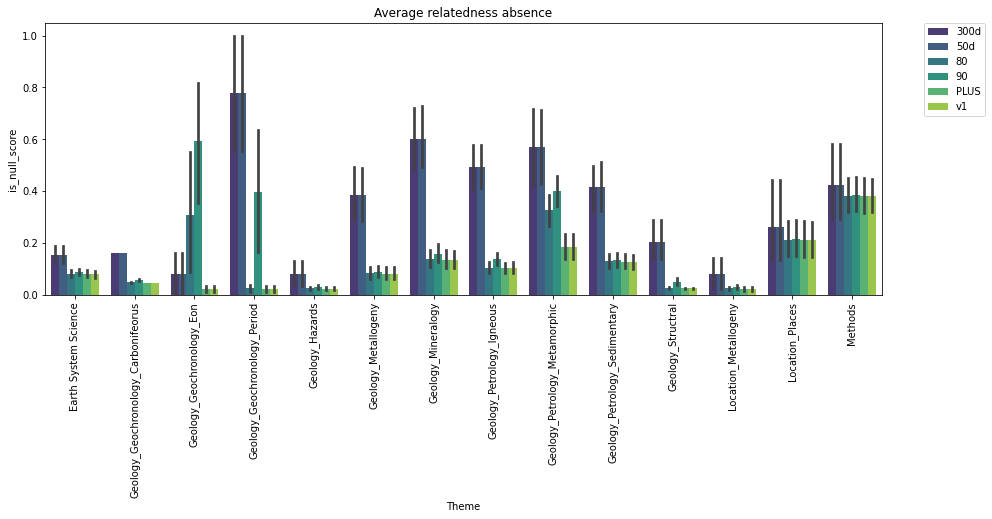

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.barplot(data=rel_res.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset', 'dim']).mean().reset_index(),x='Theme', y='score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average relatedness scores')
plt.xticks(rotation=90)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.barplot(data=rel_res.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset', 'dim']).mean().reset_index(),x='Theme', y='is_null_score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average relatedness absence')
plt.xticks(rotation=90)

### Plot the relatedness scores on each type across pipeline, and compare to the number of words present per group

(array([0, 1, 2]),
 [Text(0, 0, 'Intra-theme'),
  Text(1, 0, 'Outra-theme'),
  Text(2, 0, 'Gradient')])

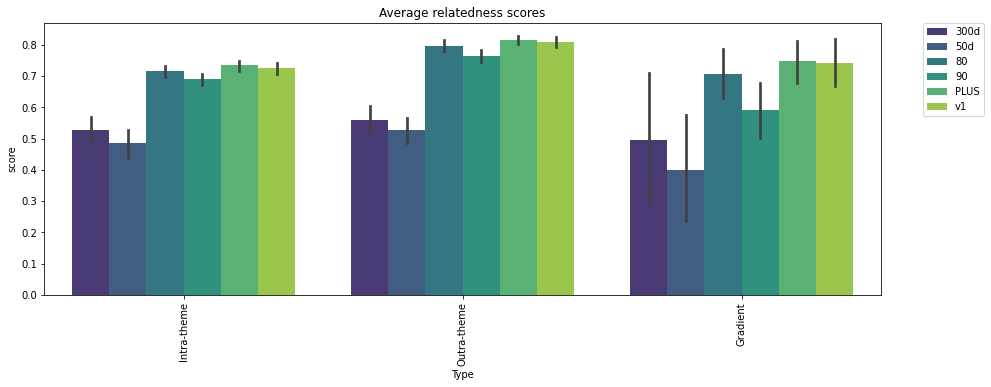

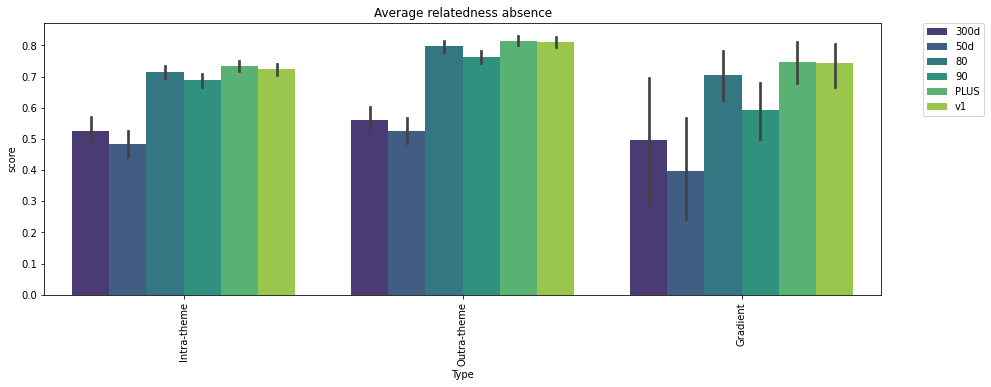

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.barplot(data=rel_res.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset', 'dim']).mean().reset_index(),x='Type', y='score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average relatedness scores')
plt.xticks(rotation=90)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
g = sns.barplot(data=rel_res.groupby(['Theme', 'Type','rowid', 'pipeline', 'dataset', 'dim']).mean().reset_index(),x='Type', y='score',hue='pipeline', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average relatedness absence')
plt.xticks(rotation=90)

### Plot performance on test Type vs Theme for the pretrained vs A+B+D PLUS 300d 

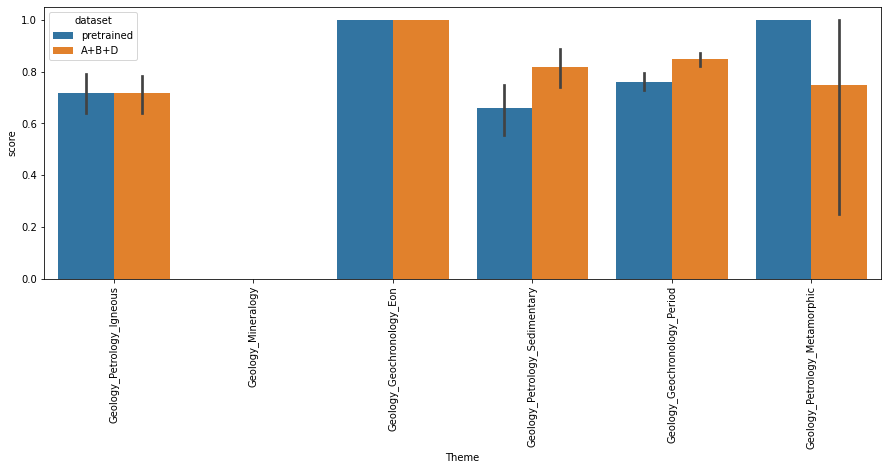

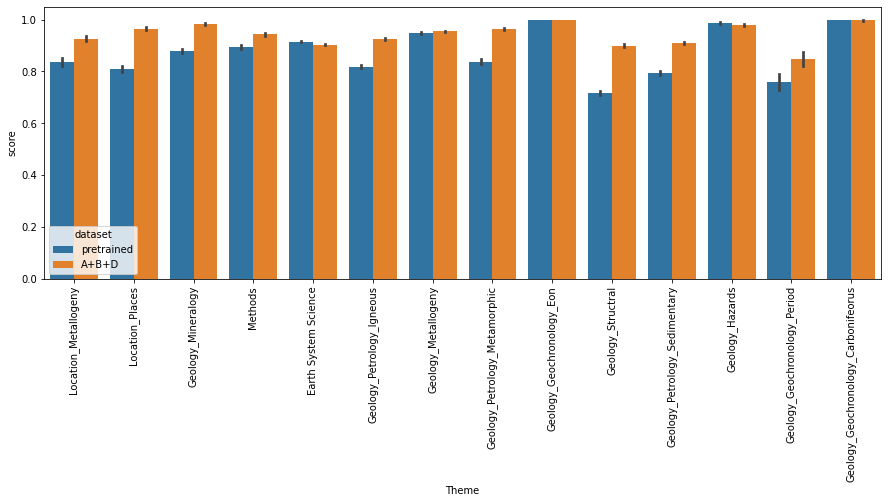

In [149]:
x = rel_res
x = x[x.model.isin(['glove.6B.300d', 'glove.dA_full_dB_dD.PLUS.300'])]

y = x[x.Type == 'Gradient']
plt.figure(figsize=(15,5))
sns.barplot(data= y, y='score', x='Theme', hue='dataset') #, hue='pipeline', hue_order=['pretrained', 'v1', '80', '90', 'PLUS'])

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)
plt.show()

y = x
plt.figure(figsize=(15,5))
sns.barplot(data= y, y='score', x='Theme', hue='dataset') #, hue='pipeline', hue_order=['pretrained', 'v1', '80', '90', 'PLUS'])

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)
plt.show()



## Clustering

In [243]:
format_func = lambda MODEL_NAME: f'clustering_merged_{MODEL_NAME}.csv'
clustering_res = concat_files(format_func)

clustering_merged_glove.dA_full.v1.csv
clustering_merged_glove.dA_full_dB.v1.csv
clustering_merged_glove.dA_full_dB_dD.v1.csv
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/clustering_merged_glove.B.v1.csv'
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/clustering_merged_glove.D.v1.csv'
clustering_merged_glove.dA_full.80.csv
clustering_merged_glove.dA_full_dB.80.csv
clustering_merged_glove.dA_full_dB_dD.80.csv
clustering_merged_glove.dA_full.90.csv
clustering_merged_glove.dA_full_dB.90.csv
clustering_merged_glove.dA_full_dB_dD.90.csv
clustering_merged_glove.dA_full.PLUS.csv
clustering_merged_glove.dA_full_dB.PLUS.csv
clustering_merged_glove.dA_full_dB_dD.PLUS.csv
clustering_merged_glove.6B.300d.csv
clustering_merged_glove.6B.50d.csv
clustering_merged_glove.dA_full.v1.300.csv
clustering_merged_glove.dA_full_dB.v1.300.csv
clustering_merged_glove.dA_full_dB_dD.v1.300.csv
clustering_merged_glove.d

In [35]:
clustering_res

,Unnamed: 0,0,1,scores,Cluster,nwords,perc_words_in_vocab,model,dataset,pipeline,dim
0,0,Compositions,Alteration types,0.720044,Alteration types,20,0.85,glove.dA_full.v1,dA_full,v1,50
1,1,Envionment,Alteration types,0.948610,Alteration types,20,0.85,glove.dA_full.v1,dA_full,v1,50
2,2,Events,Alteration types,0.911176,Alteration types,20,0.85,glove.dA_full.v1,dA_full,v1,50
3,3,Fault types,Alteration types,0.964286,Alteration types,20,0.85,glove.dA_full.v1,dA_full,v1,50
4,4,Foliation type,Alteration types,0.836898,Alteration types,20,0.85,glove.dA_full.v1,dA_full,v1,50
...,...,...,...,...,...,...,...,...,...,...,...
235,235,Particle shapes,Exploration activity,0.966667,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
236,236,Particle types,Exploration activity,0.930588,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
237,237,Rock types,Exploration activity,0.987342,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
238,238,Commodities,Exploration activity,0.961567,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


### Plot clustering results across pipeline and dataset, comparing 50d vs 300d models

,model,dataset,pipeline,dim,Unnamed: 0,scores,nwords,perc_words_in_vocab
0,glove.6B.300d,pretrained,pretrained,300,119.5,0.779633,56.25,0.768478
1,glove.6B.50d,pretrained,pretrained,50,119.5,0.746587,56.25,0.768478
2,glove.dA_full.80,A,80,50,119.5,0.856716,56.25,0.956847
3,glove.dA_full.80.300,A,80,300,119.5,0.880062,56.25,0.956847
4,glove.dA_full.90,A,90,50,119.5,0.843723,56.25,0.938312
5,glove.dA_full.90.300,A,90,300,119.5,0.872029,56.25,0.938312
6,glove.dA_full.PLUS,A,PLUS,50,119.5,0.871140,56.25,0.965357
7,glove.dA_full.PLUS.300,A,PLUS,300,119.5,0.877203,56.25,0.965357
8,glove.dA_full.v1,A,v1,50,119.5,0.854083,56.25,0.969419
9,glove.dA_full.v1.300,A,v1,300,119.5,0.877721,56.25,0.969419


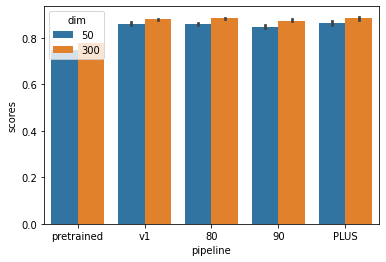

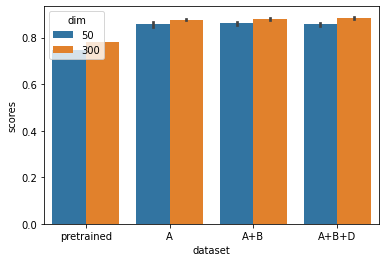

In [65]:
x = clustering_res.groupby(['model', 'dataset', 'pipeline', 'dim']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

display(x)

sns.barplot(data=x.reset_index(), y='scores', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='scores', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

### Plot clustering results across pipeline and dataset, comparing 50d vs 300d models, first averaging across cluster

Averaging across cluster is the ideal way to do this comparison. 

,model,dataset,pipeline,dim,Cluster,Unnamed: 0,scores,nwords,perc_words_in_vocab
0,glove.6B.300d,pretrained,pretrained,300,Alteration types,7,0.528770,20,0.150000
1,glove.6B.300d,pretrained,pretrained,300,Commodities,202,0.846430,222,0.819820
2,glove.6B.300d,pretrained,pretrained,300,Compositions,22,0.831584,27,0.555556
3,glove.6B.300d,pretrained,pretrained,300,Envionment,37,0.825437,92,0.847826
4,glove.6B.300d,pretrained,pretrained,300,Envionmental impact,217,0.841960,30,0.966667
...,...,...,...,...,...,...,...,...,...
411,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,Lineation,127,0.821243,16,1.000000
412,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,Metamorphic facies,142,0.880033,17,1.000000
413,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,Particle shapes,157,0.870734,15,1.000000
414,glove.dA_full_dB_dD.v1.300,A+B+D,v1,300,Particle types,172,0.862877,57,0.894737


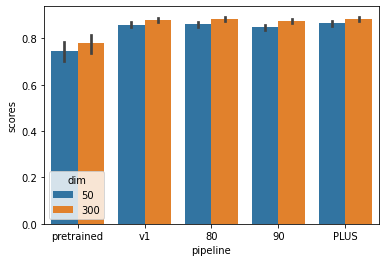

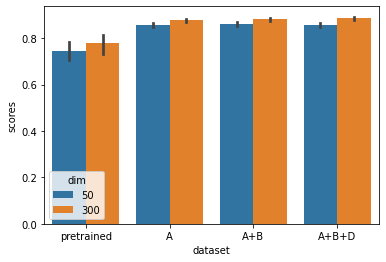

In [67]:
x = clustering_res.groupby(['model', 'dataset', 'pipeline', 'dim', 'Cluster']).mean() #value_count(normalize=True)
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')
display(x)

sns.barplot(data=x.reset_index(), y='scores', x='pipeline', hue='dim', order=['pretrained', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

sns.barplot(data=x.reset_index(), y='scores', x='dataset', hue='dim', order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

### Plot clustering performance across clusters (and clusters vs pipeline and dataset)

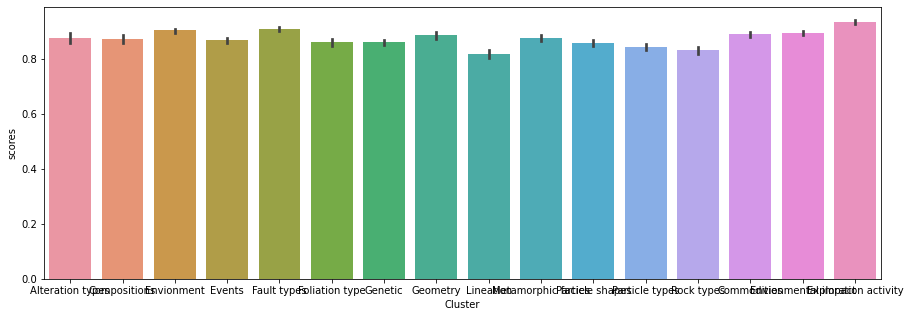

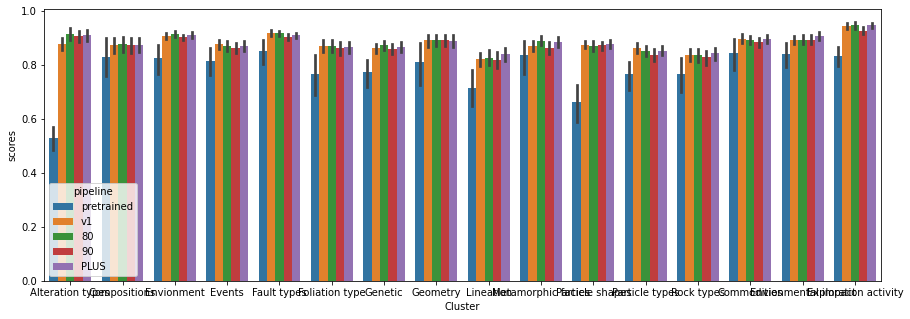

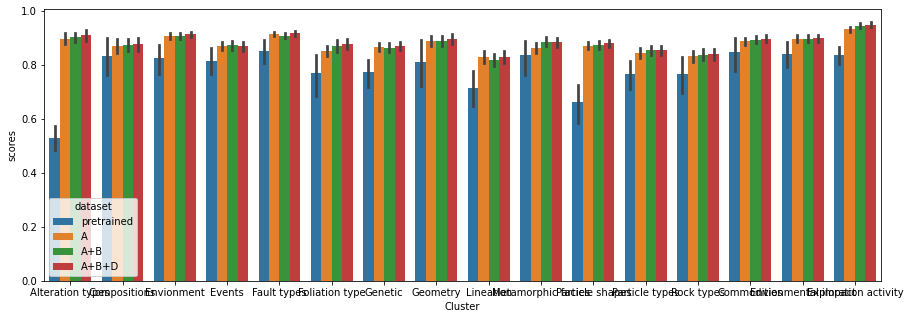

In [133]:
x = clustering_res
x = x.reset_index()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')

x = x[(x.dim == 300)]

plt.figure(figsize=(15,5))
sns.barplot(data=x.reset_index(), y='scores', x='Cluster') #, hue='pipeline', hue_order=['pretrained', 'v1', '80', '90', 'PLUS'])

plt.show()

plt.figure(figsize=(15,5))

sns.barplot(data=x.reset_index(), y='scores', x='Cluster', hue='pipeline', hue_order=['pretrained', 'v1', '80', '90', 'PLUS'])

plt.show()

plt.figure(figsize=(15,5))

sns.barplot(data=x.reset_index(), y='scores', x='Cluster', hue='dataset', hue_order=['pretrained', 'A', 'A+B', 'A+B+D'])#, hue_order=['50d', '300d', 'v1', '80', '90', 'PLUS'])

plt.show()

### Display clustering results for each model in a color-coded table

In [58]:
clustering_res.groupby(['pipeline', 'dataset']).mean()

with pd.option_context('display.max_rows', None):
    dff = clustering_res.groupby(['0','pipeline', 'dataset', 'dim' ]).agg({'scores': ['mean', 'std']}).groupby(['pipeline', 'dataset','dim']).agg('mean')
    dff[('scores', 'ub')] = dff[('scores','mean')] + dff[('scores', 'std')]
    dff[('scores', 'lb')] = dff[('scores','mean')] - dff[('scores', 'std')]

    display(dff.reindex(index = ['50d','300d','v1','80', '90', 'PLUS'],level=0,)
            .reorder_levels(order=['dim', 'pipeline', 'dataset']).sort_index(level=['dim', 'pipeline', 'dataset'])
            .style.background_gradient(cmap='Blues')) 

### Display the clustering scores across all models for each cluster independently 

In [63]:
with pd.option_context('display.max_rows', None):
    dff = clustering_res.groupby(['0','pipeline', 'dataset', 'dim',]).agg({'scores': ['mean', 'std']})
    dff[('scores', 'ub')] = dff[('scores','mean')] + dff[('scores', 'std')]
    dff[('scores', 'lb')] = dff[('scores','mean')] - dff[('scores', 'std')]
    dff = dff.reset_index(level=0)

    for g in dff['0'].unique():
        print(g)
        display(dff[dff['0'] == g].reindex(index = ['50d','300d','v1','80', '90', 'PLUS'],level=0,)
            .reorder_levels(order=['dim', 'pipeline', 'dataset']).sort_index(level=['dim', 'pipeline', 'dataset'])
            .style.background_gradient(cmap='Blues'))

Alteration types


Commodities


Compositions


Envionment


Envionmental impact


Events


Exploration activity


Fault types


Foliation type


Genetic


Geometry


Lineation


Metamorphic facies


Particle shapes


Particle types


Rock types


### Plot clustering performance across themes for the pretrained 300d and A+B+D 300d models

In [199]:
x = clustering_res
x = x[(x.model == 'glove.6B.300d') | (x.model == 'glove.dA_full_dB_dD.PLUS.300')]
x

,Unnamed: 0,0,1,scores,Cluster,nwords,perc_words_in_vocab,model,dataset,pipeline,dim
0,0,Compositions,Alteration types,0.466667,Alteration types,20,0.15,glove.6B.300d,6B,300d,300
1,1,Envionment,Alteration types,0.500000,Alteration types,20,0.15,glove.6B.300d,6B,300d,300
2,2,Events,Alteration types,0.656250,Alteration types,20,0.15,glove.6B.300d,6B,300d,300
3,3,Fault types,Alteration types,0.630952,Alteration types,20,0.15,glove.6B.300d,6B,300d,300
4,4,Foliation type,Alteration types,0.500000,Alteration types,20,0.15,glove.6B.300d,6B,300d,300
...,...,...,...,...,...,...,...,...,...,...,...
235,235,Particle shapes,Exploration activity,0.966667,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
236,236,Particle types,Exploration activity,0.930588,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
237,237,Rock types,Exploration activity,0.987342,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300
238,238,Commodities,Exploration activity,0.961567,Exploration activity,25,1.00,glove.dA_full_dB_dD.PLUS.300,dA_full_dB_dD,PLUS,300


In [205]:
x[x.model.str.contains('dB')].sort_values('scores').iloc[0:10,:][['0', '1', 'scores', 'nwords', 'perc_words_in_vocab']].to_csv('clustering_worst.csv')

<AxesSubplot:xlabel='Cluster', ylabel='scores'>

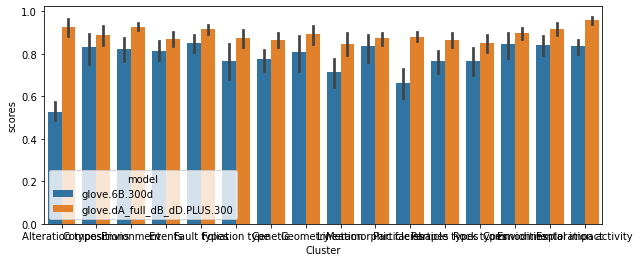

In [189]:
fig = plt.figure(figsize=(10,4))
sns.barplot(data=x, x='0', hue='model', y='scores')


### Plot the clusteirng results across clusters for the pretrained 300d and A+B+D 300d models, showing results as a box plot along with the percentage of words in the vocab per cluster

<ipython-input-198-a38935e0af97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['model'] = x.model.apply(lambda x: 'pretrained 300d' if '6B' in x else 'A+B+D PLUS 300d')


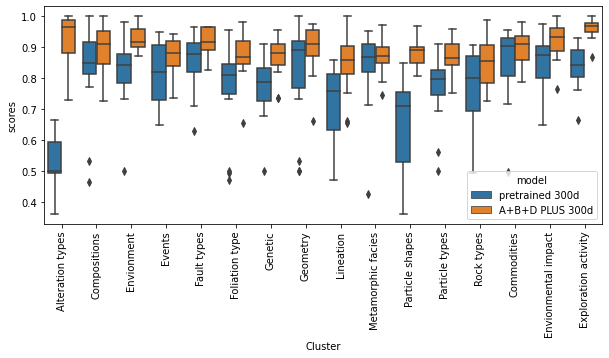

[Text(0, 0, 'Alteration types'),
 Text(1, 0, 'Compositions'),
 Text(2, 0, 'Envionment'),
 Text(3, 0, 'Events'),
 Text(4, 0, 'Fault types'),
 Text(5, 0, 'Foliation type'),
 Text(6, 0, 'Genetic'),
 Text(7, 0, 'Geometry'),
 Text(8, 0, 'Lineation'),
 Text(9, 0, 'Metamorphic facies'),
 Text(10, 0, 'Particle shapes'),
 Text(11, 0, 'Particle types'),
 Text(12, 0, 'Rock types'),
 Text(13, 0, 'Commodities'),
 Text(14, 0, 'Envionmental impact'),
 Text(15, 0, 'Exploration activity')]

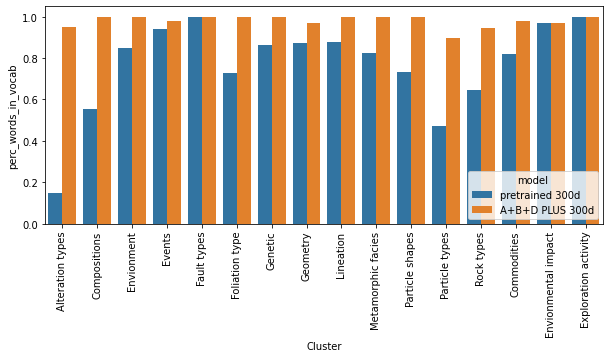

In [198]:
x = clustering_res
x = x[(x.model == 'glove.6B.300d') | (x.model == 'glove.dA_full_dB_dD.PLUS.300')]
x['model'] = x.model.apply(lambda x: 'pretrained 300d' if '6B' in x else 'A+B+D PLUS 300d')
fig = plt.figure(figsize=(10,4))
sns.boxplot(data=x, x='Cluster', y='scores',hue='model')

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)
plt.show()

sns.barplot(data=x, x='Cluster', y='perc_words_in_vocab',hue='model')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90)

### Display the clustering results per theme in a color-coded table comparing the pretrained 300d vs the A+B+D 300d models

In [224]:
x = clustering_res
x = x[(x.model == 'glove.6B.300d') | (x.model == 'glove.dA_full_dB_dD.PLUS.300')]
x['model'] = x.model.apply(lambda x: 'pretrained 300d' if '6B' in x else 'A+B+D PLUS 300d')
x = x.groupby(['model', 'Cluster']).mean().unstack(['model'])[['scores', 'perc_words_in_vocab', 'nwords']]
x.style.background_gradient(cmap='Blues', axis=None, subset=['scores'])

<ipython-input-224-fa72fb32bc2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['model'] = x.model.apply(lambda x: 'pretrained 300d' if '6B' in x else 'A+B+D PLUS 300d')


### Display the overall clustering performance across all models 

In [246]:
x = clustering_res.copy()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')
x = x.groupby(['dataset', 'pipeline', 'dim']).mean()[['scores', 'perc_words_in_vocab']]
x.style.background_gradient(cmap='Blues', axis=None, subset=['scores'])

### Display the overall clustering performance across all models, averaging first across cluster

In [248]:
x = clustering_res.copy()
x['pipeline'] = x.pipeline.apply(lambda x: 'pretrained' if x in ['300d', '50d'] else x)
x['dataset'] = x.dataset.apply(lambda x: 'pretrained' if x in ['6B'] else 'A+B+D' if 'dD' in x else 'A+B' if 'dB' in x else 'A')
x = x.groupby(['dataset', 'pipeline', 'dim', 'Cluster']).mean().groupby(['dataset', 'pipeline', 'dim']).mean()[['scores', 'perc_words_in_vocab']]
x.style.background_gradient(cmap='Blues', axis=None, subset=['scores'])

# Nearest Neighbours

In [164]:

format_func = lambda MODEL_NAME: f'{MODEL_NAME}_nn.csv'
nn = concat_files(format_func)


glove.dA_full.v1_nn.csv
glove.dA_full_dB.v1_nn.csv
glove.dA_full_dB_dD.v1_nn.csv
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/glove.B.v1_nn.csv'
[Errno 2] No such file or directory: '/nrcan_p2/data/07_model_output/glove_geology_evaluation/glove.D.v1_nn.csv'
glove.dA_full.80_nn.csv
glove.dA_full_dB.80_nn.csv
glove.dA_full_dB_dD.80_nn.csv
glove.dA_full.90_nn.csv
glove.dA_full_dB.90_nn.csv
glove.dA_full_dB_dD.90_nn.csv
glove.dA_full.PLUS_nn.csv
glove.dA_full_dB.PLUS_nn.csv
glove.dA_full_dB_dD.PLUS_nn.csv
glove.6B.300d_nn.csv
glove.6B.50d_nn.csv
glove.dA_full.v1.300_nn.csv
glove.dA_full_dB.v1.300_nn.csv
glove.dA_full_dB_dD.v1.300_nn.csv
glove.dA_full.80.300_nn.csv
glove.dA_full_dB.80.300_nn.csv
glove.dA_full_dB_dD.80.300_nn.csv
glove.dA_full.90.300_nn.csv
glove.dA_full_dB.90.300_nn.csv
glove.dA_full_dB_dD.90.300_nn.csv
glove.dA_full.PLUS.300_nn.csv
glove.dA_full_dB.PLUS.300_nn.csv
glove.dA_full_dB_dD.PLUS.300_nn.csv


In [185]:
x = nn[(nn.model == 'glove.6B.300d') | (nn.model == 'glove.dA_full_dB_dD.PLUS.300')][['word','Unnamed: 0', 'nn', 'model']]
display(x)
x['model'] = x.model.apply(lambda x: 'pretrained 300d' if '6B' in x else 'A+B+D PLUS 300d')
x = x.set_index(['model', 'word', 'Unnamed: 0']).unstack(['word']).unstack('model')
x.to_csv('nn_csv_test.csv')

,word,Unnamed: 0,nn,model
0,Earth,0,planet,glove.6B.300d
1,Earth,1,mars,glove.6B.300d
2,Earth,2,planets,glove.6B.300d
3,Earth,3,orbit,glove.6B.300d
4,Earth,4,moon,glove.6B.300d
...,...,...,...,...
45,Hazard,5,earthquake,glove.dA_full_dB_dD.PLUS.300
46,Hazard,6,probabilistic,glove.dA_full_dB_dD.PLUS.300
47,Hazard,7,threat,glove.dA_full_dB_dD.PLUS.300
48,Hazard,8,landslides,glove.dA_full_dB_dD.PLUS.300
